In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"B:\stok market analysis\AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


### There are no null values in the data set

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


In [7]:
print("shape:",df.shape)
print("size:",df.size)

shape: (2011, 6)
size: 12066


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [9]:
df.duplicated()

Date
2012-01-03    False
2012-01-04    False
2012-01-05    False
2012-01-06    False
2012-01-09    False
              ...  
2019-12-23    False
2019-12-24    False
2019-12-26    False
2019-12-27    False
2019-12-30    False
Length: 2011, dtype: bool

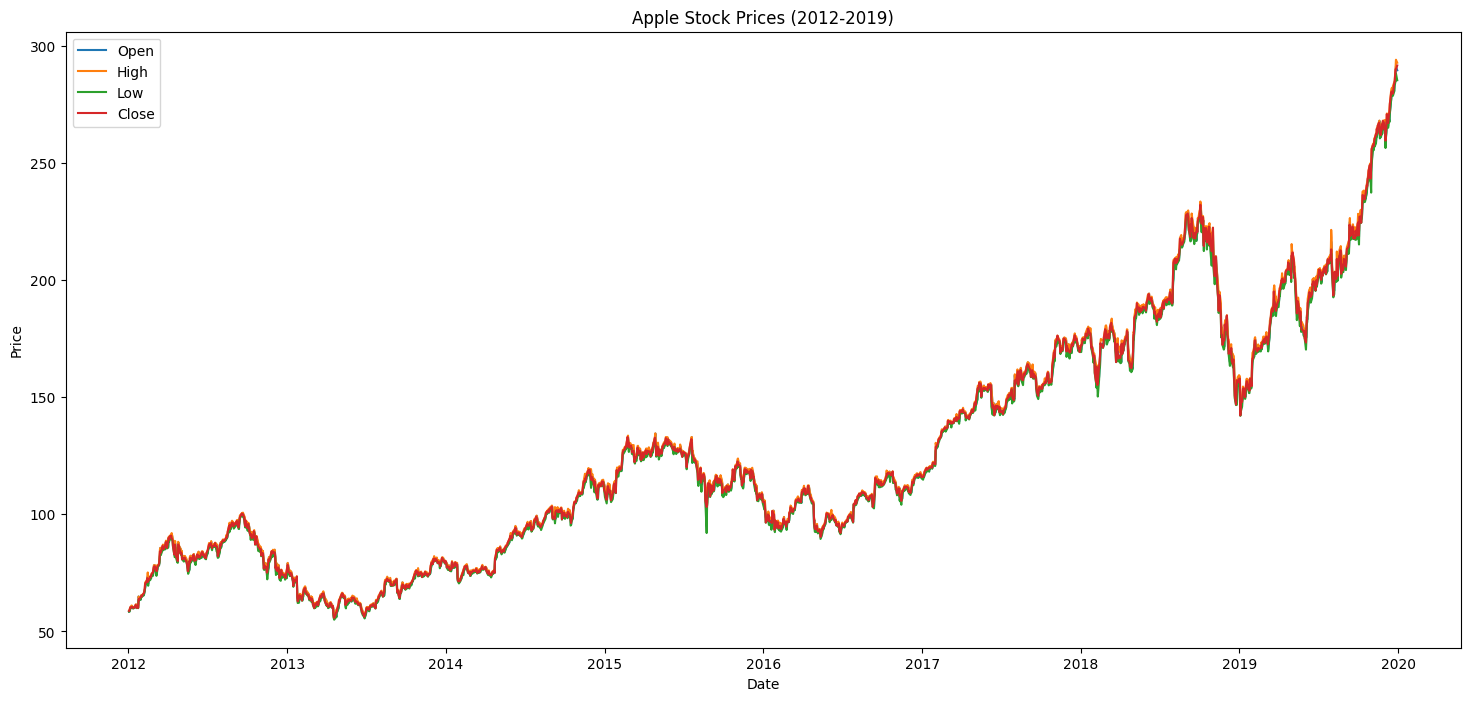

In [10]:
# Line plot for Open, High, Low, Close prices
plt.figure(figsize=(18, 8))
for col in ['Open', 'High', 'Low', 'Close']:
    plt.plot(df[col], label=col)
plt.title("Apple Stock Prices (2012-2019)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

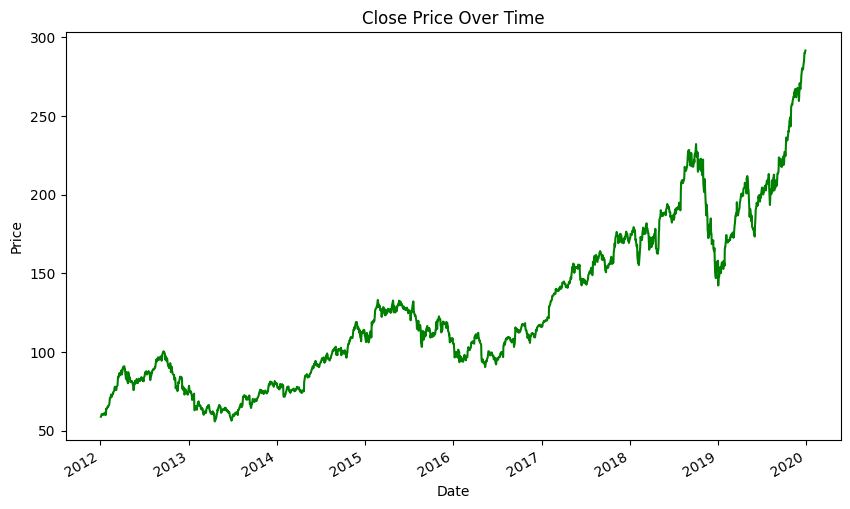

In [11]:
# Line Plot
df['Close'].plot(figsize=(10, 6), title='Close Price Over Time', ylabel='Price',color='g')
plt.show()

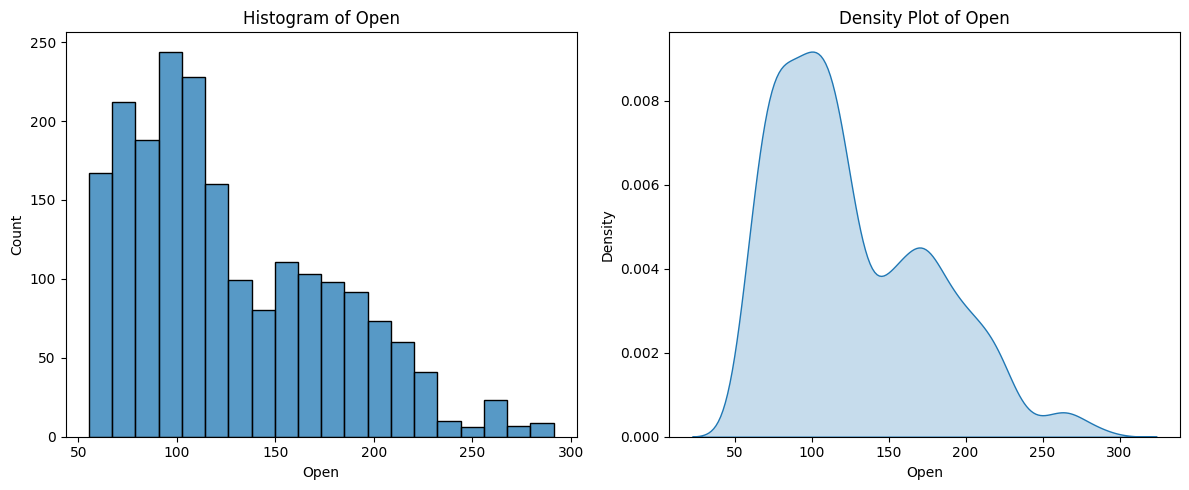

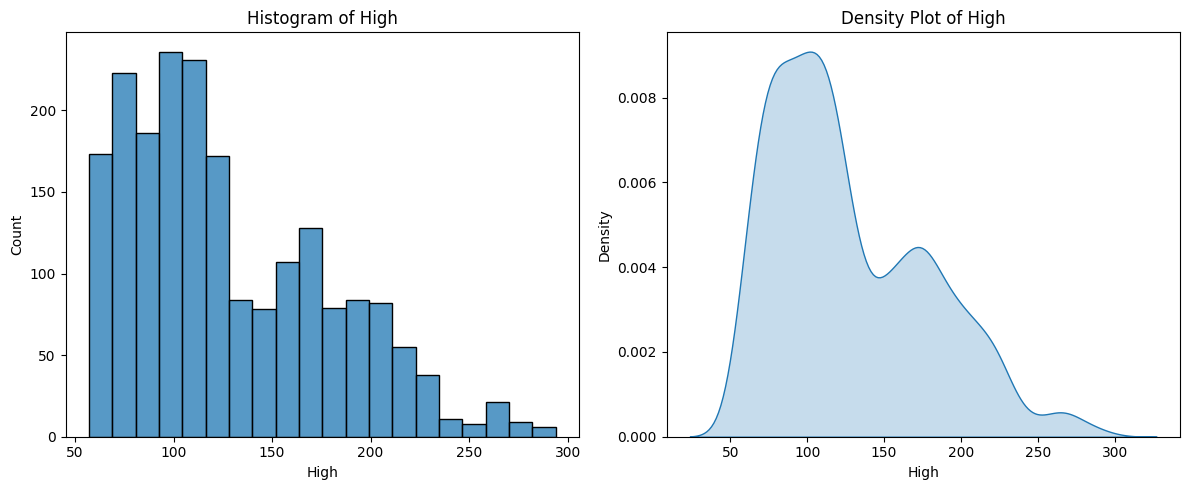

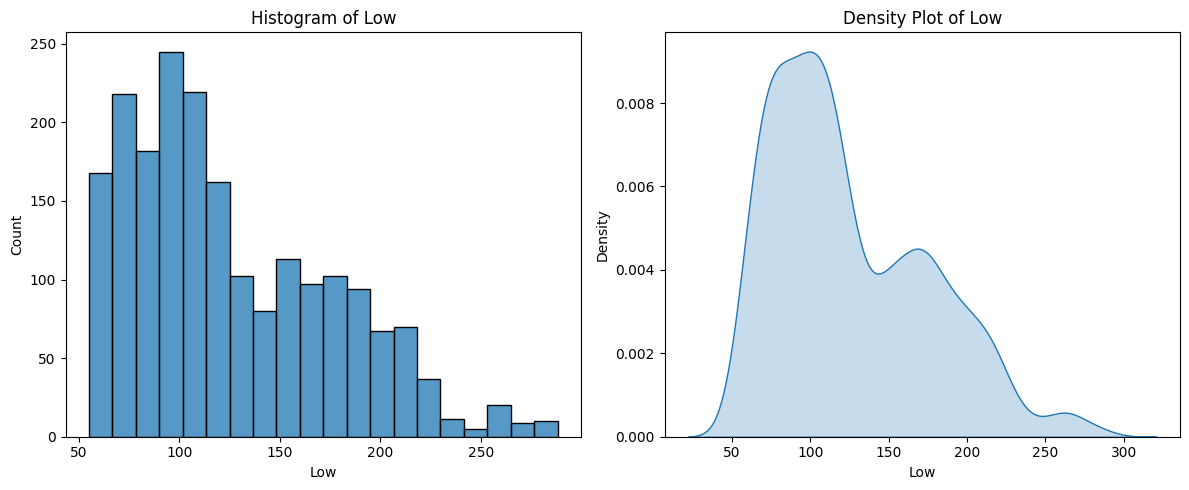

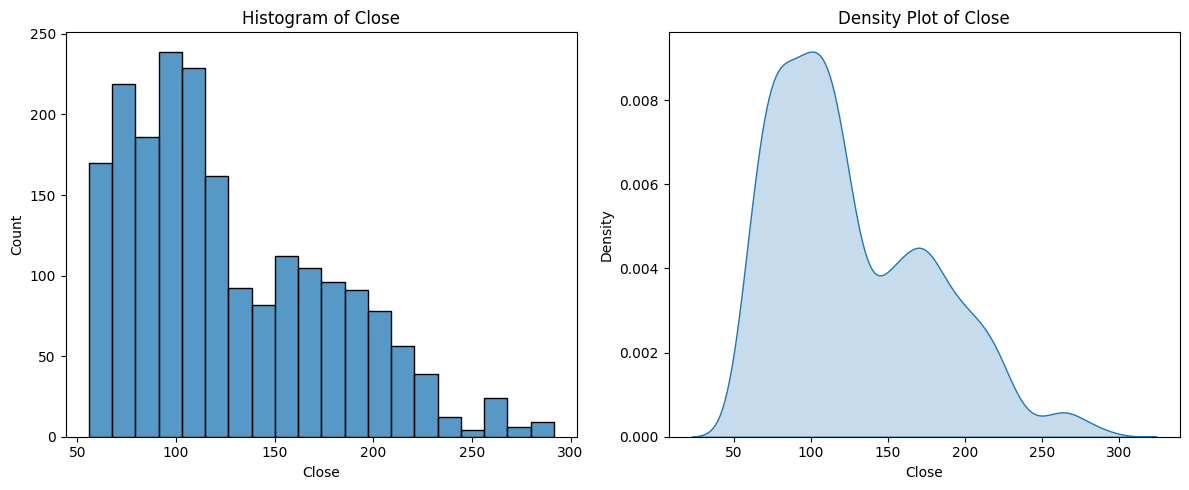

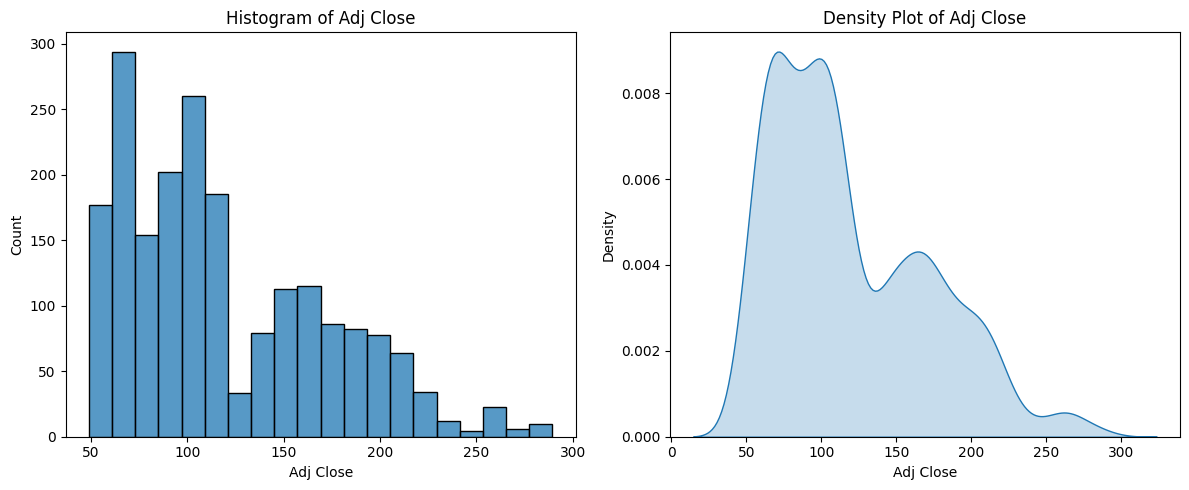

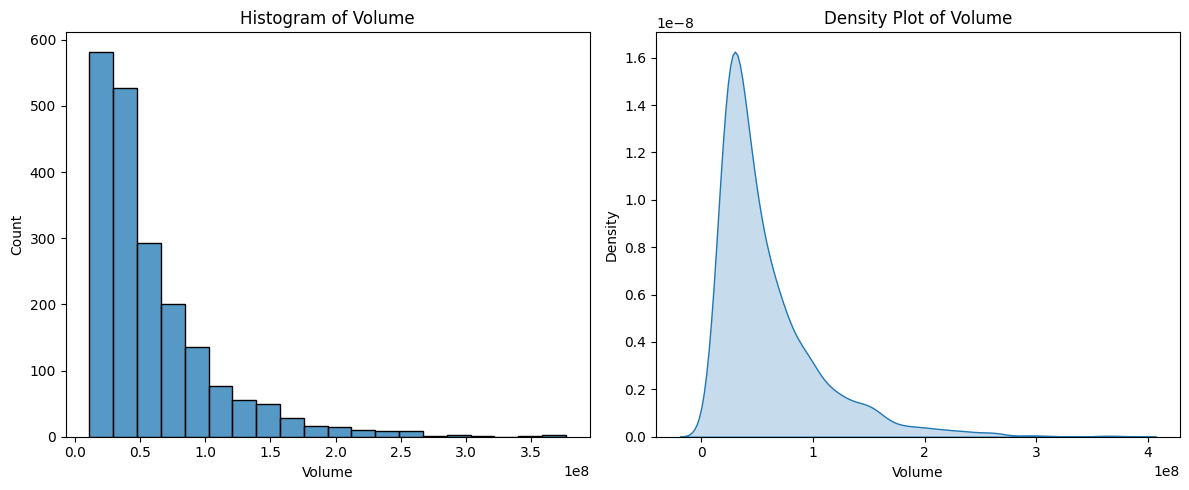

In [12]:
#Select numerical columns
num_columns = df.select_dtypes(include=['float', 'int']).columns

# Create subplots for each column
for col in num_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
    
    # Histogram
    sns.histplot(df[col], bins=20, kde=False, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    
    # Density Plot
    sns.kdeplot(df[col], shade=True, ax=axes[1])
    axes[1].set_title(f'Density Plot of {col}')
    
    plt.tight_layout()
    plt.show()

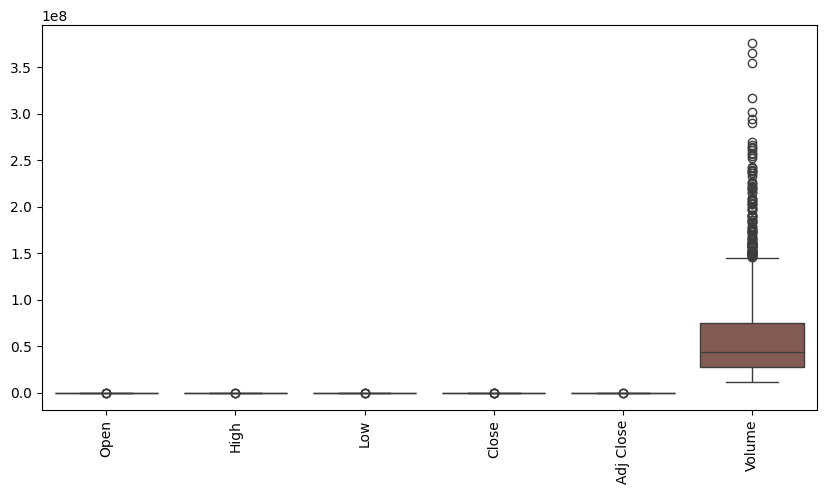

In [13]:
# Boxplots
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [14]:
# # Calculate IQR(Inter quartile range)
# Q1 = df['Volume'].quantile(0.25)
# Q3 = df['Volume'].quantile(0.75)
# IQR = Q3 - Q1

# # Define outlier thresholds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers
# outliers = df[(df['Volume'] < lower_bound) | (df['Volume'] > upper_bound)]
# print(f"Number of outliers: {len(outliers)}")
# print(f"Data shape beofre removing outliers: {df.shape}")
# # Remove outliers
# df_cleaned=df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]
# print(f"Data shape after removing outliers: {df_cleaned.shape}")

In [15]:
#Remove outliers in columns
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    outliers = df[(df[col] < (q1 - 1.5 * IQR)) | (df[col] > (q3 + 1.5 * IQR))]
    df = df[(df[col] >= (q1 - 1.5 * IQR)) & (df[col] <= (q3 + 1.5 * IQR))]

In [16]:
outliers

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-25,64.919998,64.921425,63.389999,63.808571,55.139496,239578500
2012-02-09,68.680000,70.964287,68.651428,70.452858,60.881111,221053700
2012-02-10,70.137146,71.088570,69.792854,70.488571,60.911942,157825500
2012-02-15,73.465714,75.184288,70.984283,71.095711,61.436600,376530000
2012-02-16,70.214287,72.127144,69.518570,71.744286,61.997032,236138000
...,...,...,...,...,...,...
2014-04-24,81.172859,81.428574,80.104286,81.110001,72.923035,189977900
2014-04-28,81.828575,85.107140,81.792854,84.870003,76.303528,167371400
2014-09-09,99.080002,103.080002,96.139999,97.989998,89.031967,189846300


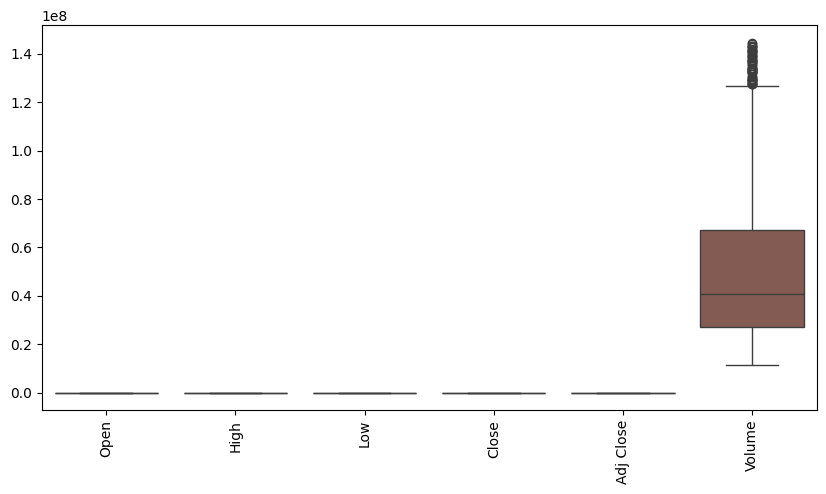

In [17]:
# Boxplots after data cleaning and preprocessing
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

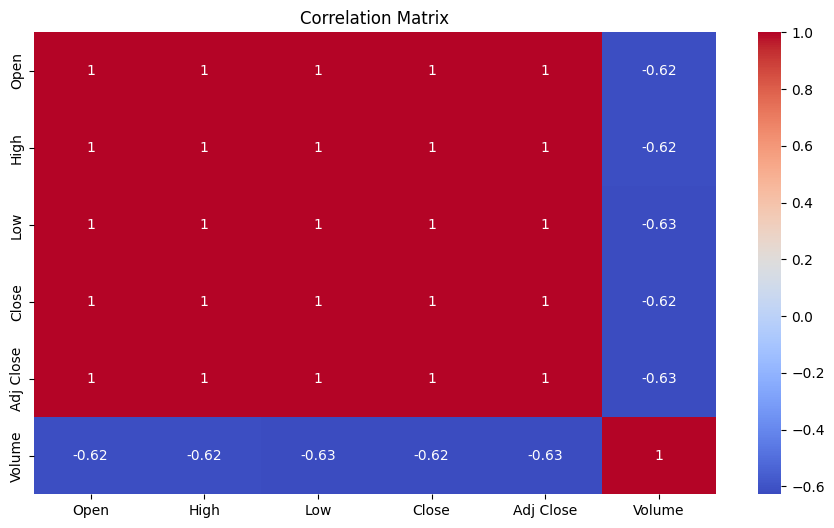

In [18]:
# Plot heatmap
plt.figure(figsize=(11, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

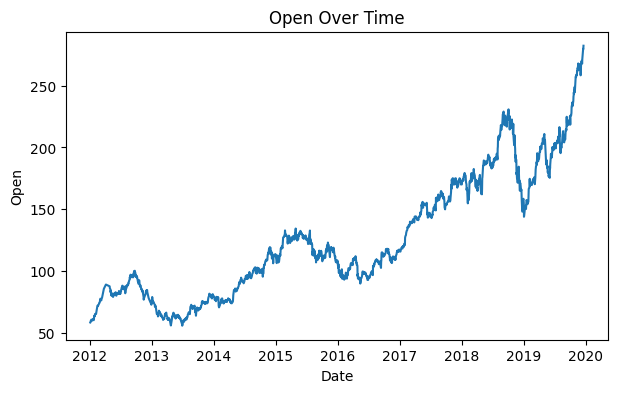

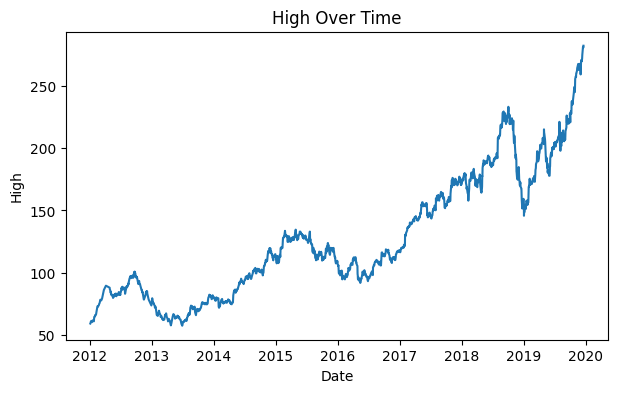

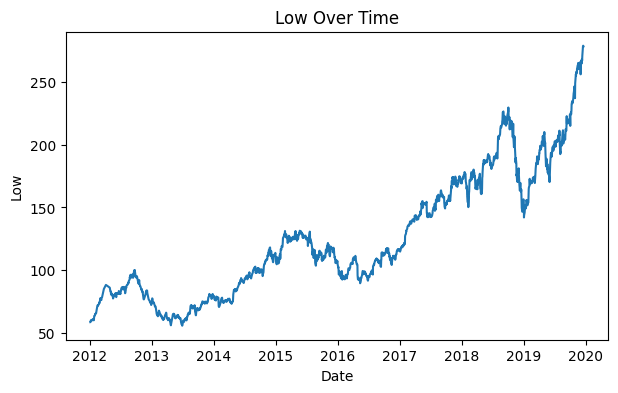

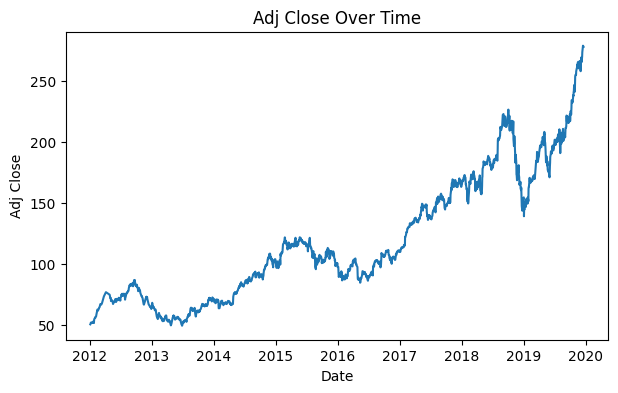

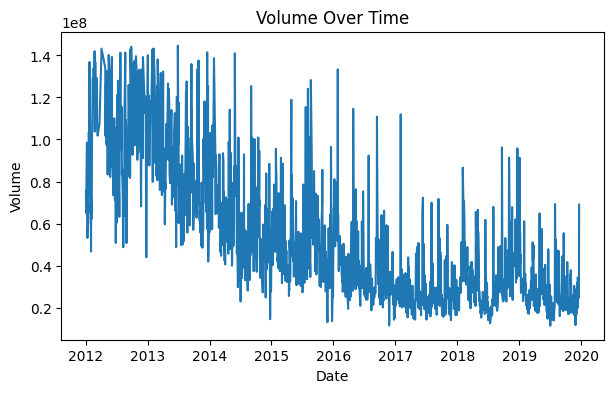

In [19]:
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']

for col in features:
    plt.figure(figsize=(7, 4)) 
    sns.lineplot(data=df, x=df.index, y=col)
    plt.title(f"{col} Over Time")
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.show()

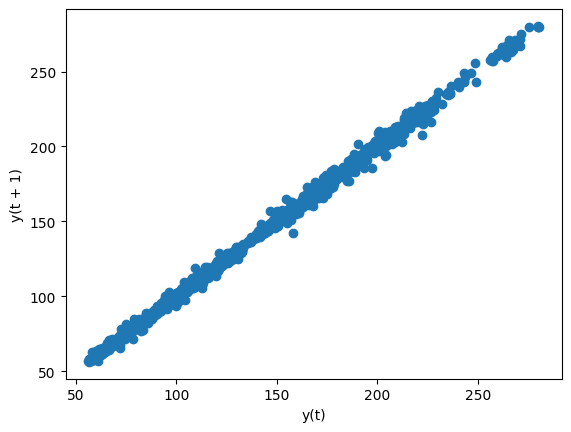

In [20]:
from pandas.plotting import lag_plot
from matplotlib import pyplot

lag_plot(df['Close'])
pyplot.show()

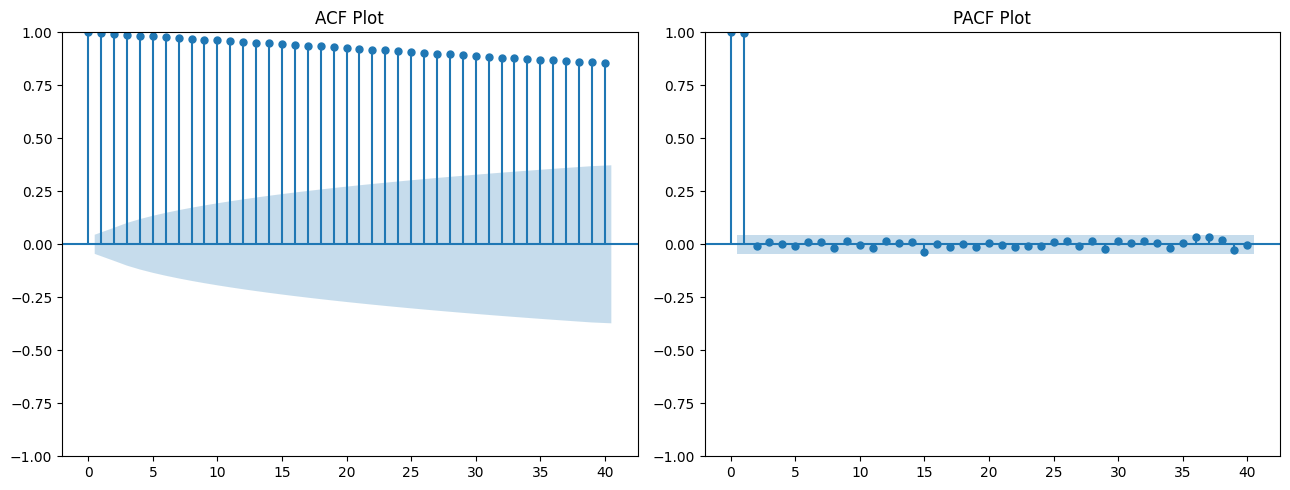

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# ACF plot
plot_acf(df['Close'], lags=40, ax=axes[0])
axes[0].set_title('ACF Plot')

# PACF plot
plot_pacf(df['Close'], lags=40, ax=axes[1])
axes[1].set_title('PACF Plot')

plt.tight_layout()
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test

# H0 : the data is non-stationary
# H1 : the data is stationary

# If the p-value < 0.05, Reject the null hypothesis. The time series is likely stationary.
# If the p-value ≥ 0.05, Fail to reject the null hypothesis. The time series is likely non-stationary.

adf_result = adfuller(df['Close'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

# Interpret the result
if adf_result[1] <= 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: 0.8530604319404578
p-value: 0.9924461341921569
Critical Values: {'1%': np.float64(-3.433851764270508), '5%': np.float64(-2.863086831883029), '10%': np.float64(-2.5675934770796993)}
The data is non-stationary (fail to reject the null hypothesis).


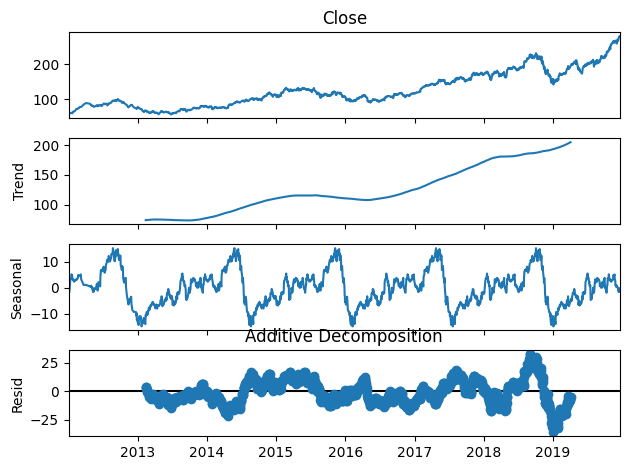

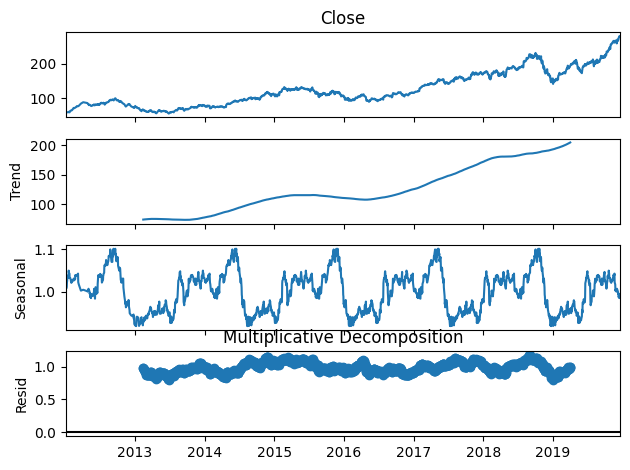

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive decomposition
additive_result = seasonal_decompose(df['Close'], model='additive', period=365)

# Multiplicative decomposition
multiplicative_result = seasonal_decompose(df['Close'], model='multiplicative', period=365)

# Plot results
additive_result.plot()
plt.title('Additive Decomposition')
plt.show()

multiplicative_result.plot()
plt.title('Multiplicative Decomposition')
plt.show()

In [24]:
# Calculate variance of residuals
additive_residual_variance = additive_result.resid.var()
multiplicative_residual_variance = multiplicative_result.resid.var()

print(f"Additive Residual Variance: {additive_residual_variance}")
print(f"Multiplicative Residual Variance: {multiplicative_residual_variance}")

Additive Residual Variance: 108.52432130018875
Multiplicative Residual Variance: 0.005713966394712335


<Axes: xlabel='Date'>

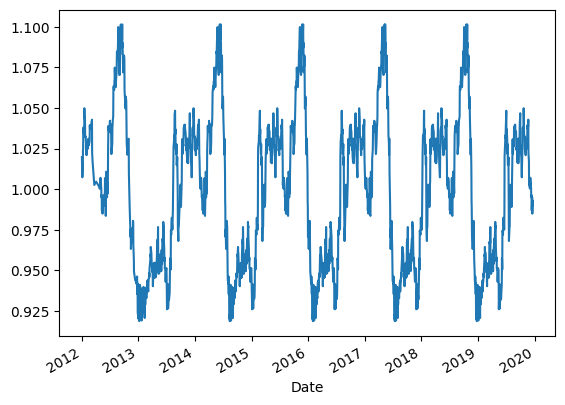

In [25]:
# multiplicative model has lower residual variance, it’s better for this data.
multiplicative_result.seasonal.plot()

<Axes: xlabel='Date'>

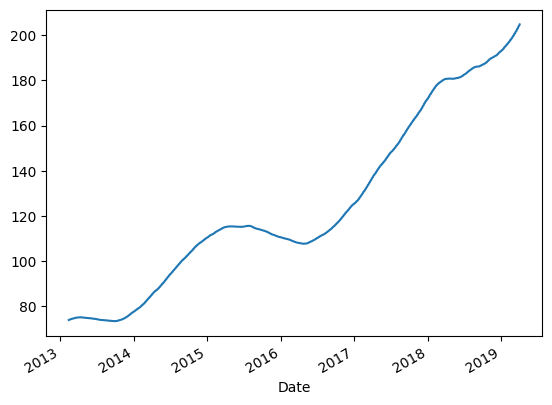

In [26]:
multiplicative_result.trend.plot()

<Axes: xlabel='Date'>

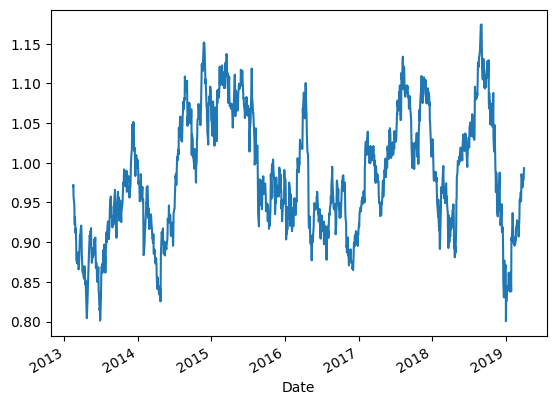

In [27]:
multiplicative_result.resid.plot()

Correlation with Target Variable: Close        1.000000
Low          0.999776
High         0.999746
Open         0.999496
Adj Close    0.999412
Volume      -0.621902
Name: Close, dtype: float64


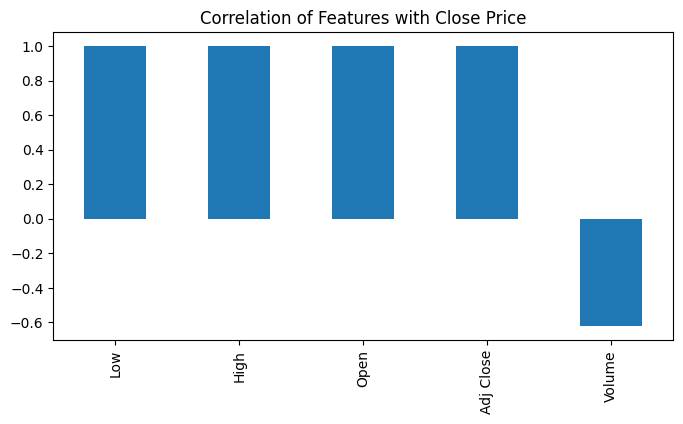

In [28]:
# Calculate correlation of features with the target variable
correlation_with_target = df.corr()['Close'].sort_values(ascending=False)
print("Correlation with Target Variable:", correlation_with_target)

correlation_with_target.drop('Close').plot(kind='bar', figsize=(8, 4))
plt.title("Correlation of Features with Close Price")
plt.show()

In [29]:
# calculate skewness and Kurtosis
skewness = df['Close'].skew()
kurtosis = df['Close'].kurt()

print('Skewness:', skewness)
print('Kurtosis:', kurtosis)

Skewness: 0.6712845829576508
Kurtosis: -0.33666997732415727


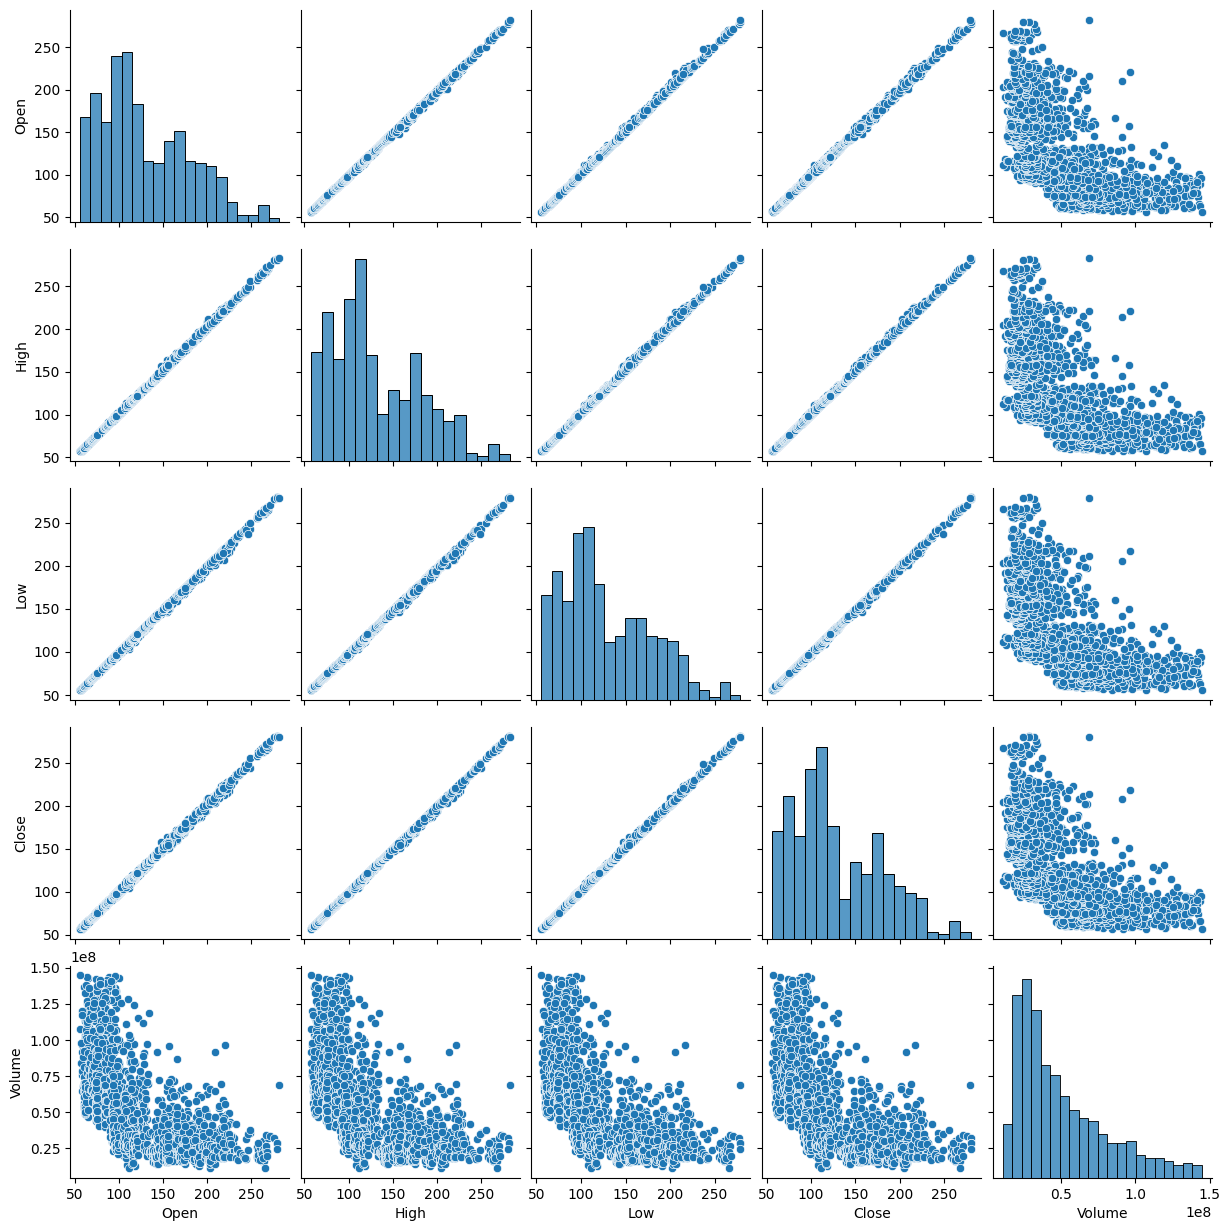

In [30]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.show()

In [31]:
monthly_data=df.resample('M').mean()
monthly_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-31,61.058346,61.396391,60.695339,61.089474,52.789814,7.765185e+07
2012-02-29,69.694285,70.258901,69.345605,70.024725,60.511119,1.008533e+08
2012-03-31,79.217429,79.752286,78.832857,79.439714,68.646977,1.102430e+08
2012-04-30,87.196070,87.326073,85.808214,86.392500,74.655159,1.263698e+08
2012-05-31,81.442411,82.064465,80.458481,81.172946,70.144737,1.114838e+08
...,...,...,...,...,...,...
2019-08-31,205.262274,207.609546,202.849546,204.957728,202.738817,3.095794e+07
2019-09-30,217.727499,219.471001,215.939500,217.994999,215.853332,2.712836e+07
2019-10-31,234.929565,236.969131,232.945218,235.286521,232.974974,2.644794e+07


<Axes: xlabel='Date'>

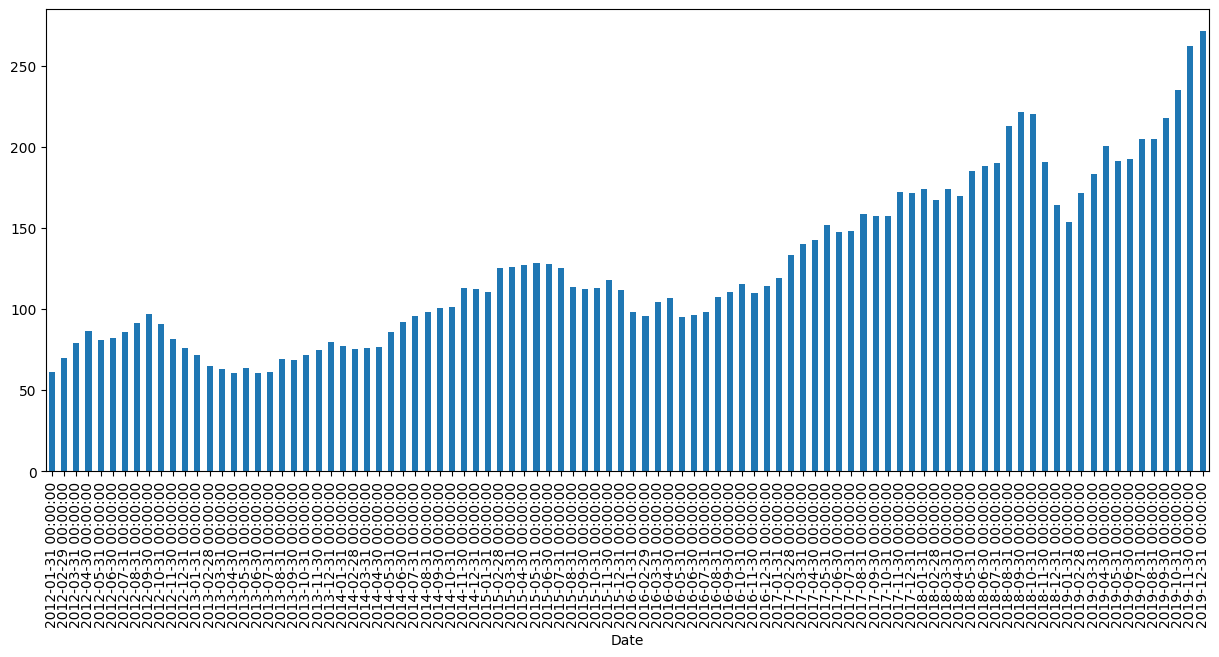

In [32]:
monthly_data['Close'].plot(kind='bar',figsize=(15,6))

In [33]:
monthly_data['Close'].min()

np.float64(60.69142864285714)

In [34]:
# Find the row with the minimum 'Close' value
min_row = monthly_data.loc[monthly_data['Close'].idxmin()]
print(min_row)

Open         6.080357e+01
High         6.137663e+01
Low          6.019704e+01
Close        6.069143e+01
Adj Close    5.321997e+01
Volume       8.951800e+07
Name: 2013-04-30 00:00:00, dtype: float64


In [35]:
# Find the row with the maximum 'Close' value
max_row = monthly_data.loc[monthly_data['Close'].idxmax()]
print(max_row)

Open         2.708447e+02
High         2.730733e+02
Low          2.693587e+02
Close        2.715927e+02
Adj Close    2.697318e+02
Volume       2.929061e+07
Name: 2019-12-31 00:00:00, dtype: float64


In [36]:
# Calculate rolling mean and standard deviation
df['Close_rolling_mean'] = df['Close'].rolling(window=30).mean()
df['Close_rolling_std'] = df['Close'].rolling(window=30).std()

In [37]:
df

,Open,High,Low,Close,Adj Close,Volume,Close_rolling_mean,Close_rolling_std
Date,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,NaN
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN,NaN
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN,NaN
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN,NaN
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-12-16,277.000000,280.790009,276.980011,279.859985,277.942474,32046500,264.962334,5.220723
2019-12-17,279.570007,281.769989,278.799988,280.410004,278.488770,28539600,265.726001,5.741173
2019-12-18,279.799988,281.899994,279.119995,279.739990,277.823334,29007100,266.479667,6.049598


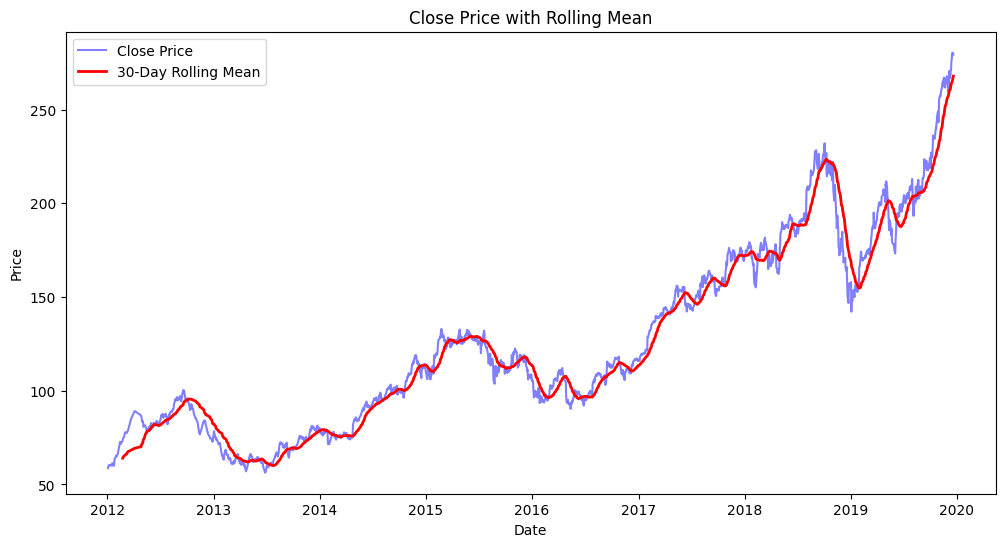

In [38]:
# Plot Close price and rolling mean
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df['Close_rolling_mean'], label='30-Day Rolling Mean', color='red', linewidth=2)
plt.title('Close Price with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

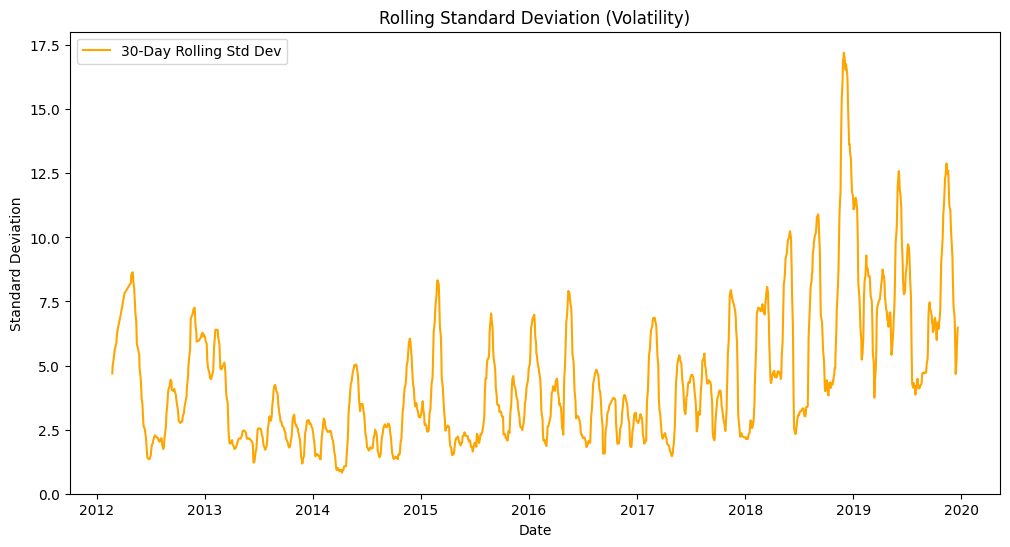

In [39]:
# Plot rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(df['Close_rolling_std'], label='30-Day Rolling Std Dev', color='orange')
plt.title('Rolling Standard Deviation (Volatility)')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()

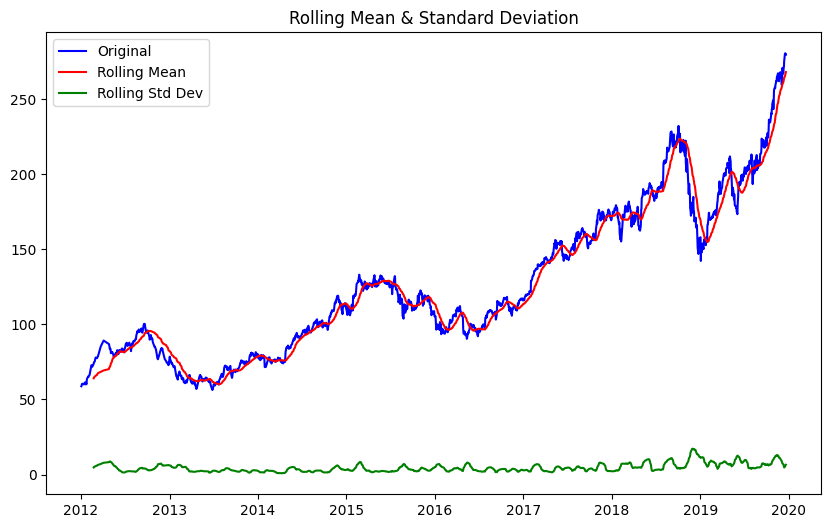

In [40]:
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Original', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [41]:
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [42]:
print(pd.date_range(start=df.index.min(), end=df.index.max(), freq='B').difference(df.index))

DatetimeIndex(['2012-01-16', '2012-01-25', '2012-02-09', '2012-02-10',
               '2012-02-15', '2012-02-16', '2012-02-20', '2012-02-21',
               '2012-02-28', '2012-02-29',
               ...
               '2018-12-05', '2018-12-25', '2019-01-01', '2019-01-21',
               '2019-02-18', '2019-04-19', '2019-05-27', '2019-07-04',
               '2019-09-02', '2019-11-28'],
              dtype='datetime64[ns]', length=200, freq=None)


In [43]:
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='B')
df = df.reindex(full_index)

In [44]:
df = df.asfreq('B')  # Set frequency to business days
df

,Open,High,Low,Close,Adj Close,Volume,Close_rolling_mean,Close_rolling_std
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200.0,NaN,NaN
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500.0,NaN,NaN
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400.0,NaN,NaN
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200.0,NaN,NaN
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-12-16,277.000000,280.790009,276.980011,279.859985,277.942474,32046500.0,264.962334,5.220723
2019-12-17,279.570007,281.769989,278.799988,280.410004,278.488770,28539600.0,265.726001,5.741173
2019-12-18,279.799988,281.899994,279.119995,279.739990,277.823334,29007100.0,266.479667,6.049598
2019-12-19,279.500000,281.179993,278.950012,280.019989,278.101410,24592300.0,267.239000,6.275300


In [45]:
print(df.index.freq)

<BusinessDay>


In [46]:
# Differencing
# A Technique used in time series analysis to transform a non-stationary time series into a stationary one.

df['Close_Diff'] = df['Close'] - df['Close'].shift(1)
df = df.dropna(subset=['Close_Diff'])

In [47]:
# Augumented Dickey Fuller Test for Differenced data
adf_result = adfuller(df['Close_Diff'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

# Interpret the result
if adf_result[1] <= 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -13.85274604705394
p-value: 6.956458839372322e-26
Critical Values: {'1%': np.float64(-3.4340986745839315), '5%': np.float64(-2.8631958309688113), '10%': np.float64(-2.567651515683604)}
The data is stationary (reject the null hypothesis).


In [48]:
# Stationarity condition satisfied.

## Spliting Dataset into Train and test sets

In [49]:
from sklearn.model_selection import train_test_split

features=['Open','High','Low','Volume']
target='Close'

In [50]:
# Define the test set start date
test_start_date = '2019-01-02'

# Split the data
train_data = df[df.index < test_start_date]  # Data before 2019
test_data = df[df.index >= test_start_date]  # Data from 2019 onwards

# Display the shapes to confirm the split
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

Training Data Shape: (1517, 9)
Testing Data Shape: (238, 9)


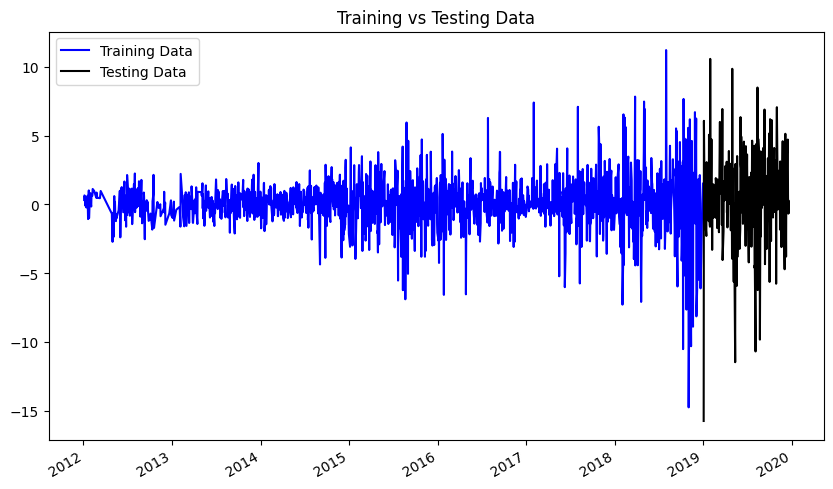

In [51]:
# Plot of Training Data vs Testing Data

plt.figure(figsize=(10, 6))
train_data['Close_Diff'].plot(label='Training Data', color='blue')
test_data['Close_Diff'].plot(label='Testing Data', color='black')
plt.legend()
plt.title('Training vs Testing Data')
plt.show()

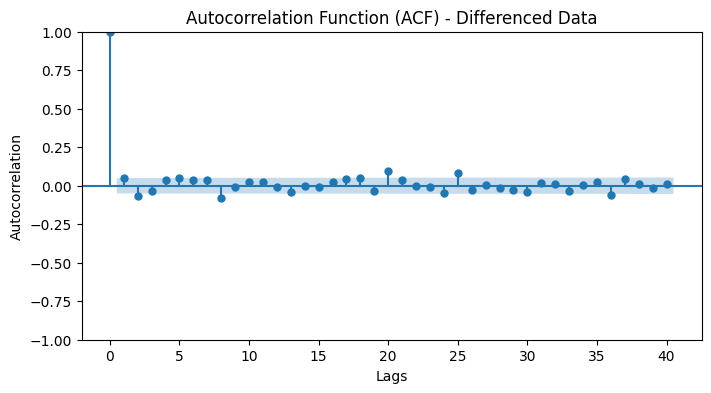

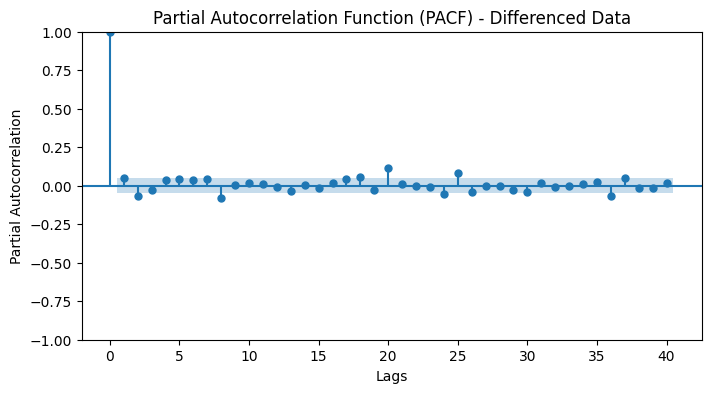

In [52]:
# ACF Plot of Differenced Close Price 

plt.figure(figsize=(8, 4))
plot_acf(train_data['Close_Diff'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Differenced Data')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# PACF Plot of Differenced Close Price 

plt.figure(figsize=(8, 4))
plot_pacf(train_data['Close_Diff'], lags=40, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF) - Differenced Data')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

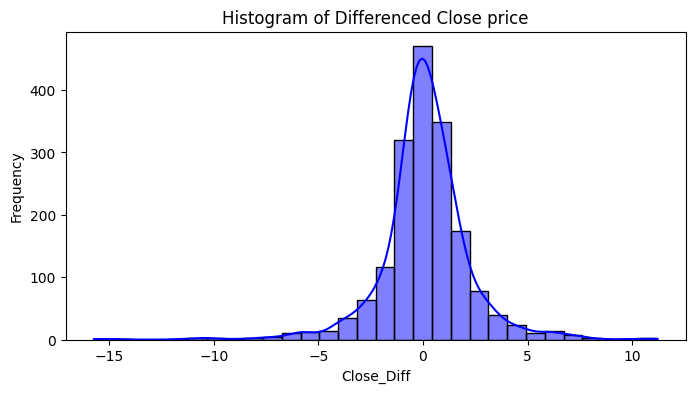

In [53]:
# Histogram of Differenced Close price data

plt.figure(figsize=(8, 4))
sns.histplot(df['Close_Diff'], kde=True, bins=30, color='blue')
plt.title('Histogram of Differenced Close price')
plt.xlabel('Close_Diff')
plt.ylabel('Frequency')
plt.show()

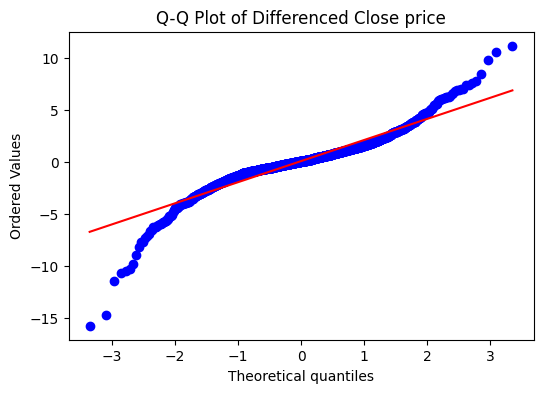

In [54]:
# Q-Q plot Differenced Close price

import scipy.stats as stats
plt.figure(figsize=(6, 4))
stats.probplot(df['Close_Diff'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Differenced Close price')
plt.show()

In [55]:
# hence stationarity and normality satisfied.

## Model Building & Evaluation

## ARIMA MODEL 

In [56]:
from statsmodels.tsa.arima.model import ARIMA

#set the frequency to business days
df=df.asfreq('B')

#Fill missing values if necessary
df=df.fillna(method='ffill')

#Verify the frequency
print(df.index.freq)  #it should shows the <BusinessDay>

<BusinessDay>


In [57]:
#Define and fit the ARIMA model
ARIMA_model=ARIMA(train_data['Close_Diff'], order=(2,0,2))
ARIMA_model_fit=ARIMA_model.fit()
ARIMA_model_fit

c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiza

In [58]:
#Make prediction on the test set
pred_ARIMA= ARIMA_model_fit.forecast(steps=len(test_data))

c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [59]:
pred_ARIMA

1517   -0.432815
1518   -1.101769
1519   -0.289264
1520    0.942163
1521    0.995642
          ...   
1750   -0.077391
1751   -0.439382
1752   -0.179477
1753    0.361345
1754    0.481048
Name: predicted_mean, Length: 238, dtype: float64

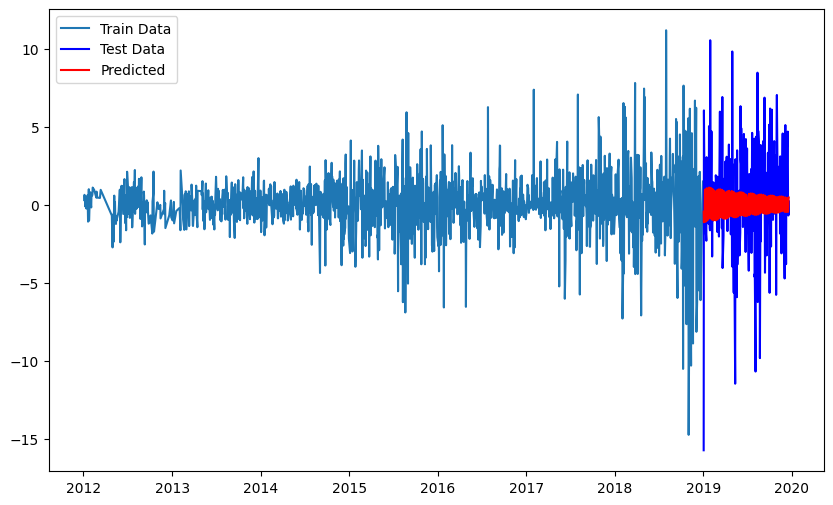

In [60]:
# Plot the  train data, test data and predicted values of ARIMA

plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data['Close_Diff'], label='Train Data')
plt.plot(test_data.index, test_data['Close_Diff'], label='Test Data', color='blue')
plt.plot(test_data.index, pred_ARIMA, label='Predicted', color='red')
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Actual values from the test set
actual = test_data['Close_Diff']

# Calculate evaluation metrics
mae_ARIMA = mean_absolute_error(actual, pred_ARIMA )
mse_ARIMA = mean_squared_error(actual, pred_ARIMA)
rmse_ARIMA = np.sqrt(mse_ARIMA)
r2_ARIMA = 1 - (np.sum((actual - pred_ARIMA) ** 2) / np.sum((actual - actual.mean()) ** 2))

In [62]:
# Print the evaluation results
print(f"ARIMA_Mean Absolute Error (MAE): {mae_ARIMA}")
print(f"ARIMA_Mean Squared Error (MSE): {mse_ARIMA}")
print(f"ARIMA_Root Mean Squared Error (RMSE): {rmse_ARIMA}")
print(f"ARIMA_R-squared (R²): {r2_ARIMA}")

ARIMA_Mean Absolute Error (MAE): 2.4332513137968608
ARIMA_Mean Squared Error (MSE): 11.089958515578042
ARIMA_Root Mean Squared Error (RMSE): 3.3301589324802565
ARIMA_R-squared (R²): 1.0


In [63]:
#Summary of model
print(ARIMA_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Close_Diff   No. Observations:                 1517
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -3100.966
Date:                Tue, 04 Feb 2025   AIC                           6213.933
Time:                        15:40:46   BIC                           6245.880
Sample:                             0   HQIC                          6225.827
                               - 1517                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0391      0.049      0.801      0.423      -0.057       0.135
ar.L1          0.6984      0.007    101.305      0.000       0.685       0.712
ar.L2         -0.9926      0.007   -142.341      0.0

In [64]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Close_rolling_mean,Close_rolling_std,Close_Diff
2019-12-16,277.000000,280.790009,276.980011,279.859985,277.942474,32046500.0,264.962334,5.220723,4.709991
2019-12-17,279.570007,281.769989,278.799988,280.410004,278.488770,28539600.0,265.726001,5.741173,0.550019
2019-12-18,279.799988,281.899994,279.119995,279.739990,277.823334,29007100.0,266.479667,6.049598,-0.670014
2019-12-19,279.500000,281.179993,278.950012,280.019989,278.101410,24592300.0,267.239000,6.275300,0.279999
2019-12-20,282.230011,282.649994,278.559998,279.440002,277.525391,68994500.0,267.906001,6.476854,-0.579987


In [65]:
# Forecast the next 30 business days
forecast_steps = 30
forecast_values = ARIMA_model_fit.forecast(steps=forecast_steps)

# Generate dates for the forecast starting after the last date in the original data
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=11), periods=forecast_steps, freq='B')

# Create a DataFrame with forecasted values
forecast_ARIMA = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_values
}).set_index('Date')

# Display the forecasted values
print(forecast_ARIMA)

            Forecast
Date                
2019-12-31 -0.432815
2020-01-01 -1.101769
2020-01-02 -0.289264
2020-01-03  0.942163
2020-01-06  0.995642
2020-01-07 -0.189333
2020-01-08 -1.069953
2020-01-09 -0.508727
2020-01-10  0.757319
2020-01-13  1.084396
2020-01-14  0.056126
2020-01-15 -0.986632
2020-01-16 -0.694183
2020-01-17  0.545100
2020-01-20  1.120275
2020-01-21  0.291833
2020-01-22 -0.857638
2020-01-23 -0.838064
2020-01-24  0.316579
2020-01-27  1.103503
2020-01-28  0.506952
2020-01-29 -0.690761
2020-01-30 -0.935052
2020-01-31  0.083203
2020-02-03  1.036794
2020-02-04  0.692015
2020-02-05 -0.495305
2020-02-06 -0.982249
2020-02-07 -0.143768
2020-02-10  0.925135


c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


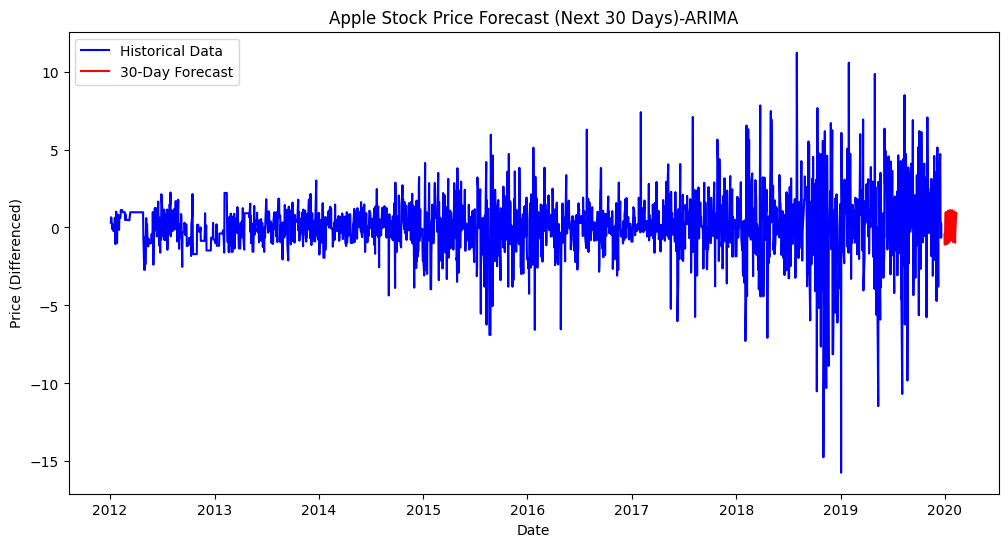

In [66]:
# Plot the historical and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df['Close_Diff'], label='Historical Data', color='blue')
plt.plot(forecast_ARIMA['Forecast'], label='30-Day Forecast', color='red', linestyle='-')
plt.title('Apple Stock Price Forecast (Next 30 Days)-ARIMA')
plt.xlabel('Date')
plt.ylabel('Price (Differenced)')
plt.legend()
plt.show()

In [67]:
# Reverse differencing to original scale
forecast_original_scale = forecast_values.cumsum() + df['Close'].iloc[-1]

# Create a DataFrame with the original scale forecast
forecast_original_ARIMA = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_original_scale
}).set_index('Date')

# Display the forecasted values in the original scale
print(forecast_original_ARIMA)

              Forecast
Date                  
2019-12-31  279.007187
2020-01-01  277.905418
2020-01-02  277.616155
2020-01-03  278.558318
2020-01-06  279.553960
2020-01-07  279.364628
2020-01-08  278.294674
2020-01-09  277.785947
2020-01-10  278.543267
2020-01-13  279.627663
2020-01-14  279.683788
2020-01-15  278.697156
2020-01-16  278.002973
2020-01-17  278.548073
2020-01-20  279.668348
2020-01-21  279.960182
2020-01-22  279.102543
2020-01-23  278.264479
2020-01-24  278.581058
2020-01-27  279.684562
2020-01-28  280.191514
2020-01-29  279.500753
2020-01-30  278.565701
2020-01-31  278.648904
2020-02-03  279.685699
2020-02-04  280.377714
2020-02-05  279.882409
2020-02-06  278.900161
2020-02-07  278.756393
2020-02-10  279.681528


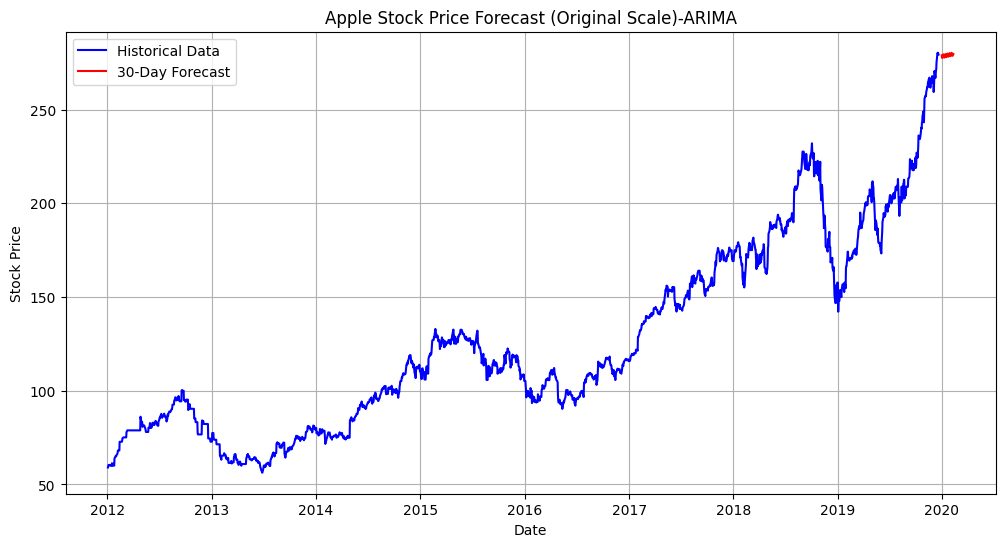

In [68]:
# Plot the historical and forecasted values
plt.figure(figsize=(12, 6))

# Plot the original historical data
plt.plot(df['Close'], label='Historical Data', color='blue')

# Plot the forecasted values (original scale)
plt.plot(forecast_original_ARIMA['Forecast'], label='30-Day Forecast', color='red', linestyle='-')

# Customize the plot
plt.title('Apple Stock Price Forecast (Original Scale)-ARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

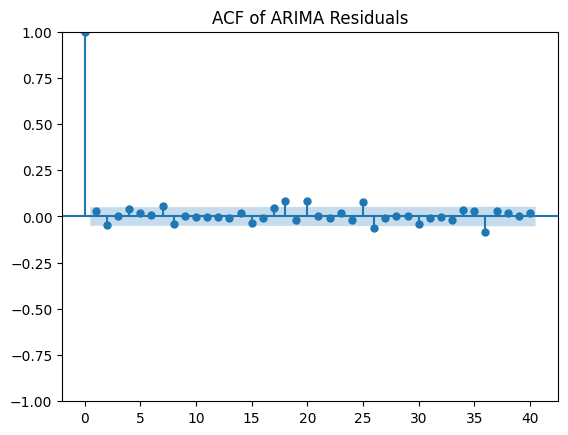

<Figure size 1000x600 with 0 Axes>

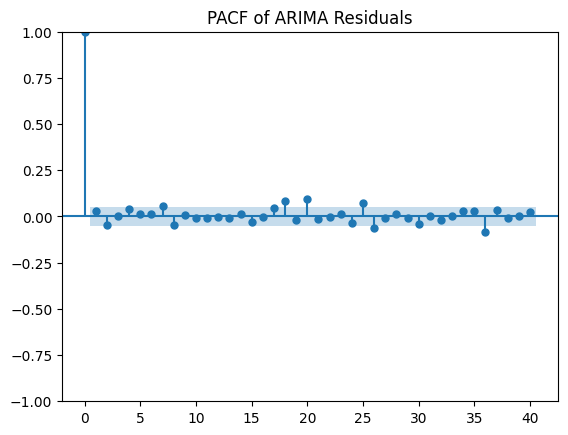

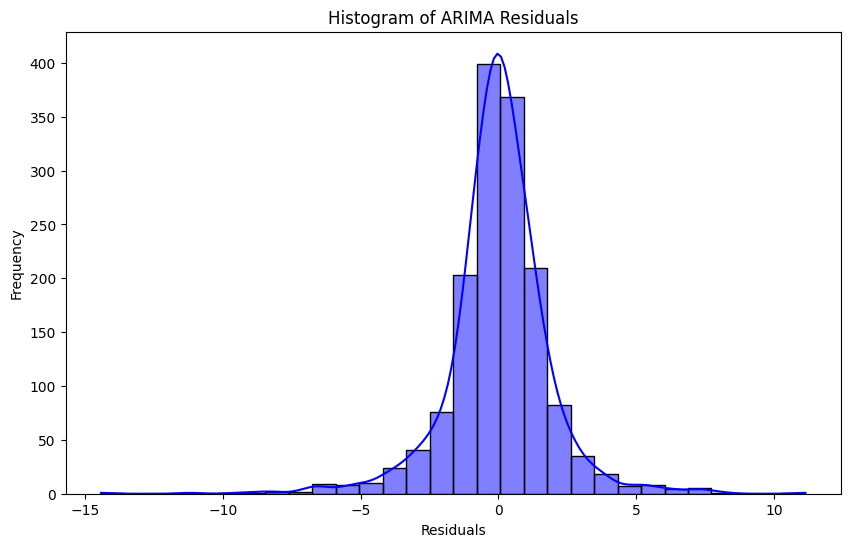

In [69]:
residuals_ARIMA = ARIMA_model_fit.resid

# 1. ACF of Residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals_ARIMA, lags=40)
plt.title("ACF of ARIMA Residuals")
plt.show()

# 2. PACF of Residuals
plt.figure(figsize=(10, 6))
plot_pacf(residuals_ARIMA, lags=40)
plt.title("PACF of ARIMA Residuals")
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_ARIMA, kde=True, bins=30, color='blue')
plt.title("Histogram of ARIMA Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## SARIMA MODEL

<Figure size 400x200 with 0 Axes>

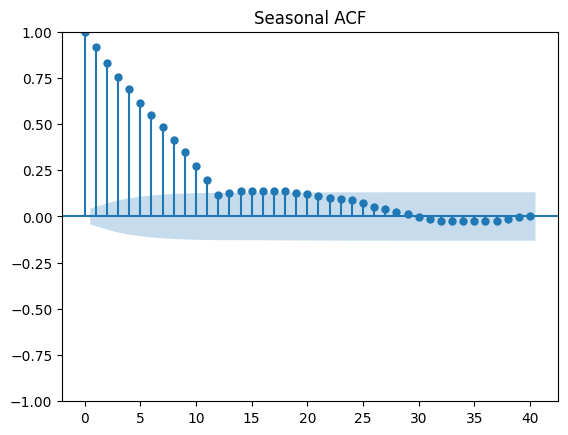

<Figure size 400x200 with 0 Axes>

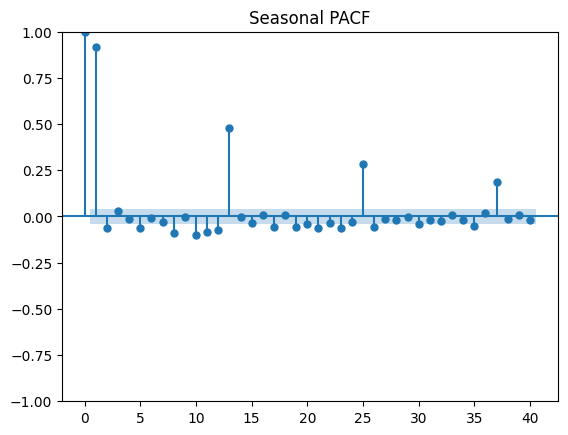

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# taking seasonal period as 12
seasonal_period = 12

# Differencing the data to remove seasonal patterns
data_diff_seasonal = df['Close'] - df['Close'].shift(12)

# Drop NA values resulting from differencing
data_diff_seasonal = data_diff_seasonal.dropna()

# Plot ACF
plt.figure(figsize=(4, 2))
plot_acf(data_diff_seasonal, lags=40, title='Seasonal ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(4, 2))
plot_pacf(data_diff_seasonal, lags=40, title='Seasonal PACF', method='ywm')
plt.show()

In [71]:
SARIMA_model = SARIMAX(
    train_data['Close_Diff'],
    order=(2, 0, 2),              # Non-seasonal (p, d, q)
    seasonal_order=(2, 0, 4, 12), # Seasonal (P, D, Q, S)
    enforce_stationarity=False,
    enforce_invertibility=False
)
SARIMA_model_fit = SARIMA_model.fit()

c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [72]:
pred_SARIMA=SARIMA_model_fit.forecast(steps=len(test_data))

c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [73]:
pred_SARIMA

1517    1.037375
1518   -0.513516
1519   -0.547603
1520    0.401966
1521    0.918893
          ...   
1750   -0.062604
1751   -0.348641
1752   -0.181535
1753    0.218347
1754    0.332218
Name: predicted_mean, Length: 238, dtype: float64

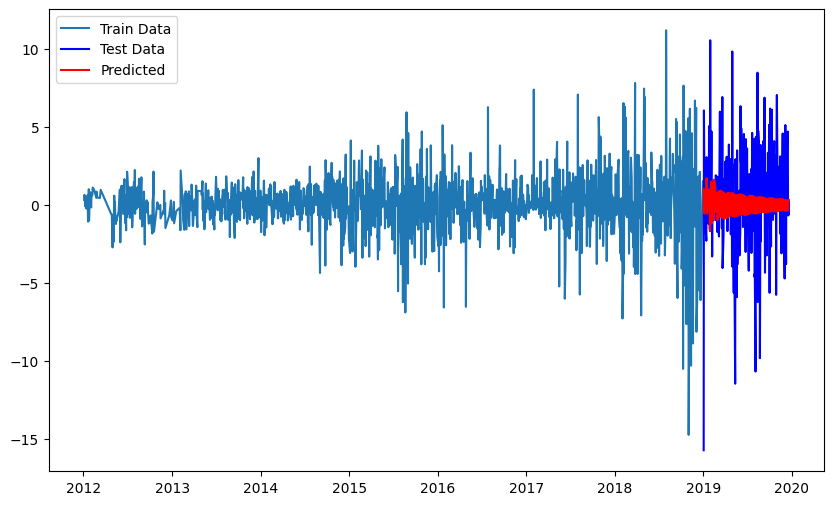

In [74]:
# Plot the actual vs predicted values Of SARIMA
plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data['Close_Diff'], label='Train Data')
plt.plot(test_data.index, test_data['Close_Diff'], label='Test Data', color='blue')
plt.plot(test_data.index, pred_SARIMA, label='Predicted', color='red')
plt.legend()
plt.show()

In [75]:
# Actual and predicted values
actual = test_data['Close_Diff']

# Evaluation metrics
mae_SARIMA = mean_absolute_error(actual, pred_SARIMA)
mse_SARIMA = mean_squared_error(actual, pred_SARIMA)
rmse_SARIMA = np.sqrt(mse_SARIMA)
r2_SARIMA = 1 - (np.sum((actual - pred_SARIMA) ** 2) / np.sum((actual - actual.mean()) ** 2))

# Display metrics
print(f"SARIMA Mean Absolute Error (MAE): {mae_SARIMA}")
print(f"SARIMA Mean Squared Error (MSE): {mse_SARIMA}")
print(f"SARIMA Root Mean Squared Error (RMSE): {rmse_SARIMA}")
print(f"SARIMA R-squared (R²): {r2_SARIMA}")

SARIMA Mean Absolute Error (MAE): 2.420877433751052
SARIMA Mean Squared Error (MSE): 11.165178830770927
SARIMA Root Mean Squared Error (RMSE): 3.3414336490151837
SARIMA R-squared (R²): 1.0


In [76]:
# Summary of the model
print(SARIMA_model_fit.summary())

                                           SARIMAX Results                                           
Dep. Variable:                                    Close_Diff   No. Observations:                 1517
Model:             SARIMAX(2, 0, 2)x(2, 0, [1, 2, 3, 4], 12)   Log Likelihood               -3012.066
Date:                                       Tue, 04 Feb 2025   AIC                           6046.132
Time:                                               15:41:06   BIC                           6104.325
Sample:                                                    0   HQIC                          6067.836
                                                      - 1517                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6985     

In [77]:
# Forecast the next 30 business days
forecast_steps = 30
forecast_values = SARIMA_model_fit.forecast(steps=forecast_steps)

# Generate dates for the forecast starting after the last date in the original data
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=11), periods=forecast_steps, freq='B')

# Create a DataFrame with forecasted values
forecast_SARIMA = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_values
}).set_index('Date')

# Display the forecasted values
print(forecast_SARIMA)

            Forecast
Date                
2019-12-31  1.037375
2020-01-01 -0.513516
2020-01-02 -0.547603
2020-01-03  0.401966
2020-01-06  0.918893
2020-01-07  0.311342
2020-01-08 -0.250780
2020-01-09 -0.323260
2020-01-10  1.731743
2020-01-13  0.780313
2020-01-14 -0.539495
2020-01-15 -0.465349
2020-01-16  0.519489
2020-01-17  0.777339
2020-01-20  0.986852
2020-01-21  0.120459
2020-01-22 -1.674938
2020-01-23 -0.511250
2020-01-24  0.827731
2020-01-27  0.822103
2020-01-28  1.507143
2020-01-29 -0.400580
2020-01-30 -1.181947
2020-01-31  0.344826
2020-02-03  1.307883
2020-02-04  0.526034
2020-02-05 -0.196850
2020-02-06 -0.935985
2020-02-07 -0.536281
2020-02-10  1.631108


c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


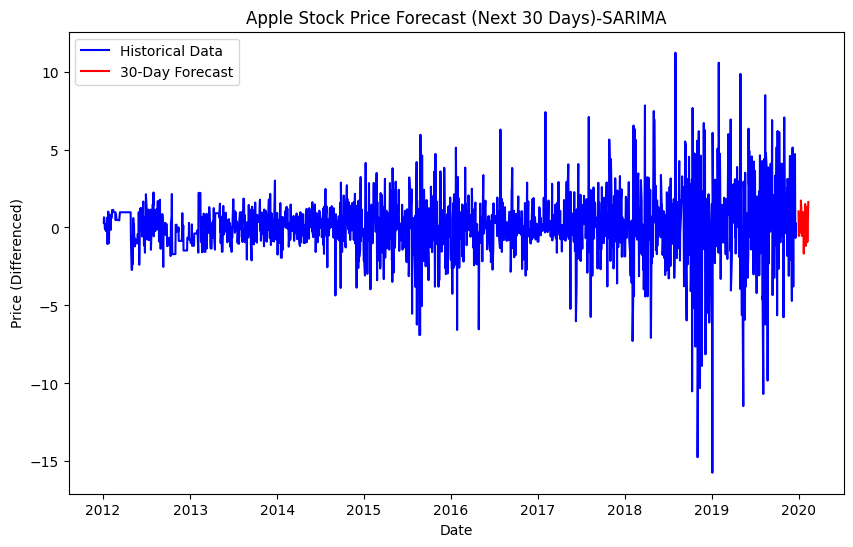

In [78]:
# Plot the historical and forecasted values Of SARIMA
plt.figure(figsize=(10, 6))
plt.plot(df['Close_Diff'], label='Historical Data', color='blue')
plt.plot(forecast_SARIMA['Forecast'], label='30-Day Forecast', color='red', linestyle='-')
plt.title('Apple Stock Price Forecast (Next 30 Days)-SARIMA')
plt.xlabel('Date')
plt.ylabel('Price (Differenced)')
plt.legend()
plt.show()

In [79]:
# Reverse differencing to original scale
forecast_original_scale = forecast_values.cumsum() + df['Close'].iloc[-1]

# Create a DataFrame with the original scale forecast
forecast_original_SARIMA = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_original_scale
}).set_index('Date')

# Display the forecasted values in the original scale
print(forecast_original_SARIMA)

              Forecast
Date                  
2019-12-31  280.477377
2020-01-01  279.963861
2020-01-02  279.416257
2020-01-03  279.818224
2020-01-06  280.737117
2020-01-07  281.048459
2020-01-08  280.797679
2020-01-09  280.474419
2020-01-10  282.206162
2020-01-13  282.986475
2020-01-14  282.446979
2020-01-15  281.981630
2020-01-16  282.501120
2020-01-17  283.278458
2020-01-20  284.265310
2020-01-21  284.385769
2020-01-22  282.710832
2020-01-23  282.199582
2020-01-24  283.027313
2020-01-27  283.849417
2020-01-28  285.356560
2020-01-29  284.955980
2020-01-30  283.774032
2020-01-31  284.118858
2020-02-03  285.426741
2020-02-04  285.952775
2020-02-05  285.755925
2020-02-06  284.819939
2020-02-07  284.283658
2020-02-10  285.914766


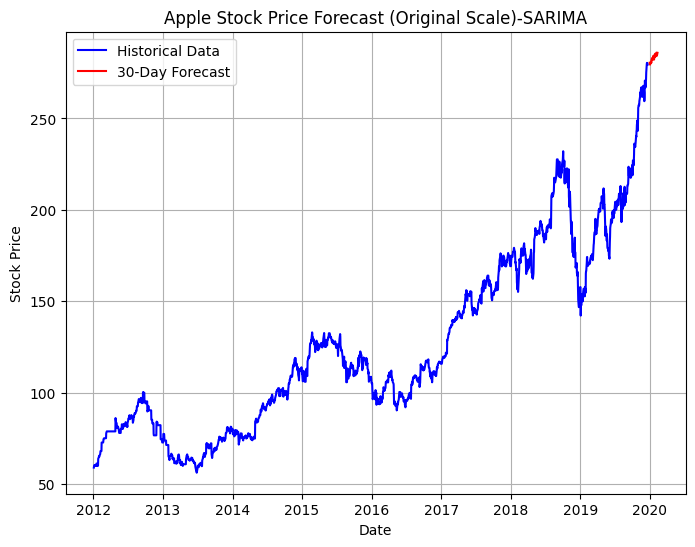

In [80]:
# Plot the historical and forecasted values
plt.figure(figsize=(8, 6))

# Plot the original historical data
plt.plot(df['Close'], label='Historical Data', color='blue')

# Plot the forecasted values (original scale)
plt.plot(forecast_original_SARIMA['Forecast'], label='30-Day Forecast', color='red', linestyle='-')

# Customize the plot
plt.title('Apple Stock Price Forecast (Original Scale)-SARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()

<Figure size 800x400 with 0 Axes>

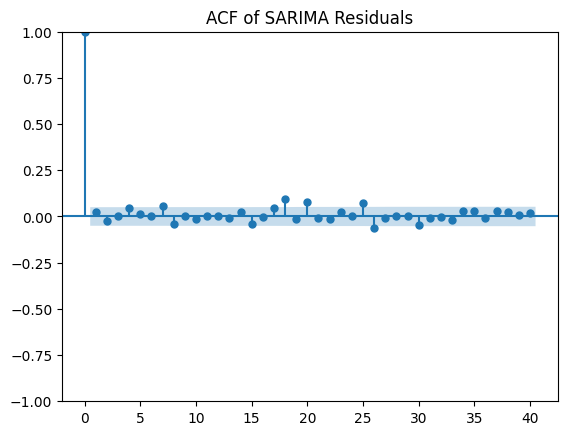

<Figure size 800x400 with 0 Axes>

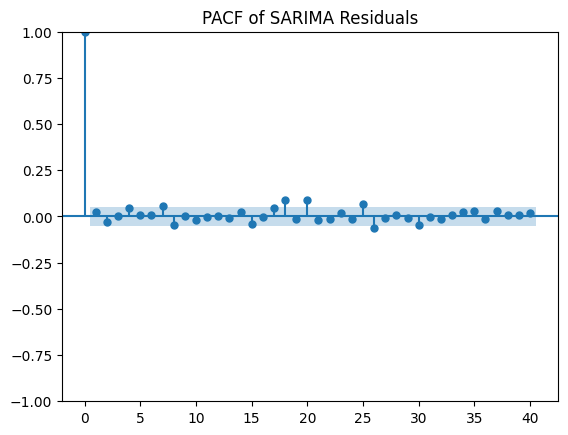

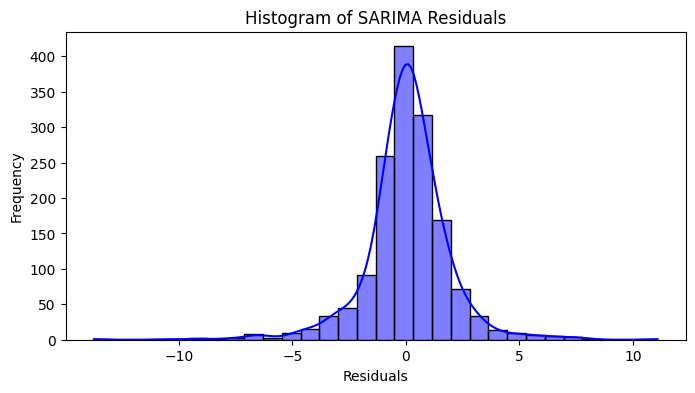

In [81]:
residuals_SARIMA = SARIMA_model_fit.resid

# 1. ACF of Residuals
plt.figure(figsize=(8, 4))
plot_acf(residuals_SARIMA, lags=40)
plt.title("ACF of SARIMA Residuals")
plt.show()

# 2. PACF of Residuals
plt.figure(figsize=(8, 4))
plot_pacf(residuals_SARIMA, lags=40)
plt.title("PACF of SARIMA Residuals")
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals_SARIMA, kde=True, bins=30, color='blue')
plt.title("Histogram of SARIMA Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Simple Exponential Smoothing

In [82]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

SES_model = ExponentialSmoothing(train_data['Close_Diff'], trend=None, seasonal=None)
SES_model_fit = SES_model.fit()
SES_pred = SES_model_fit.forecast(steps=len(test_data))


c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [83]:
SES_pred

1517    0.039735
1518    0.039735
1519    0.039735
1520    0.039735
1521    0.039735
          ...   
1750    0.039735
1751    0.039735
1752    0.039735
1753    0.039735
1754    0.039735
Length: 238, dtype: float64

In [84]:
# Actual values from the test set
actual = test_data['Close_Diff']

# Calculate evaluation metrics
mae_SES = mean_absolute_error(actual, SES_pred)
mse_SES = mean_squared_error(actual, SES_pred)
rmse_SES = np.sqrt(mse_SES)
r2_SES = 1 - (np.sum((actual - SES_pred) ** 2) / np.sum((actual - actual.mean()) ** 2))

In [85]:
# Print the evaluation results
print(f"SES Mean Absolute Error (MAE): {mae_SES}")
print(f"SES Mean Squared Error (MSE): {mse_SES}")
print(f"SES Root Mean Squared Error (RMSE): {rmse_SES}")
print(f"SES R-squared (R²): {r2_SES}")

SES Mean Absolute Error (MAE): 2.3878108845052317
SES Mean Squared Error (MSE): 10.750338185824882
SES Root Mean Squared Error (RMSE): 3.2787708346001985
SES R-squared (R²): 1.0


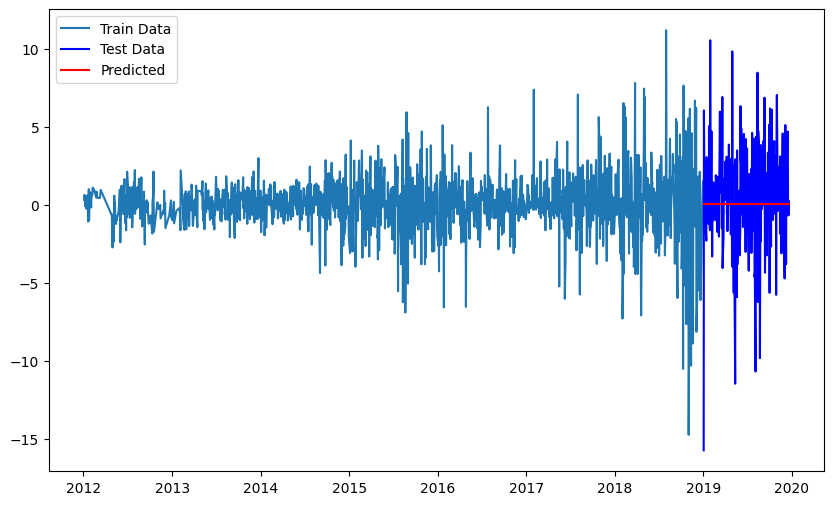

In [86]:
# Plot the actual vs predicted values Of SES
plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data['Close_Diff'], label='Train Data')
plt.plot(test_data.index, test_data['Close_Diff'], label='Test Data', color='blue')
plt.plot(test_data.index, SES_pred, label='Predicted', color='red')
plt.legend()
plt.show()

In [87]:
#Summary the model
print(SES_model_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Close_Diff   No. Observations:                 1517
Model:             ExponentialSmoothing   SSE                           5395.068
Optimized:                         True   AIC                           1928.695
Trend:                             None   BIC                           1939.343
Seasonal:                          None   AICC                          1928.721
Seasonal Periods:                  None   Date:                 Tue, 04 Feb 2025
Box-Cox:                          False   Time:                         15:41:06
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level           1.4901e-08                alpha                 True
initial_level              0.03973

In [88]:
# Forecast the next 30 business days Using SES
forecast_steps = 30
forecast_values = SES_model_fit.forecast(steps=forecast_steps)

c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [89]:
# Generate dates for the forecast starting after the last date in the original data
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=11), periods=forecast_steps, freq='B')

In [90]:
# Create a DataFrame with forecasted values
forecast_SES = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_values
}).set_index('Date')

# Display the forecasted values
print(forecast_SES)

            Forecast
Date                
2019-12-31  0.039735
2020-01-01  0.039735
2020-01-02  0.039735
2020-01-03  0.039735
2020-01-06  0.039735
2020-01-07  0.039735
2020-01-08  0.039735
2020-01-09  0.039735
2020-01-10  0.039735
2020-01-13  0.039735
2020-01-14  0.039735
2020-01-15  0.039735
2020-01-16  0.039735
2020-01-17  0.039735
2020-01-20  0.039735
2020-01-21  0.039735
2020-01-22  0.039735
2020-01-23  0.039735
2020-01-24  0.039735
2020-01-27  0.039735
2020-01-28  0.039735
2020-01-29  0.039735
2020-01-30  0.039735
2020-01-31  0.039735
2020-02-03  0.039735
2020-02-04  0.039735
2020-02-05  0.039735
2020-02-06  0.039735
2020-02-07  0.039735
2020-02-10  0.039735


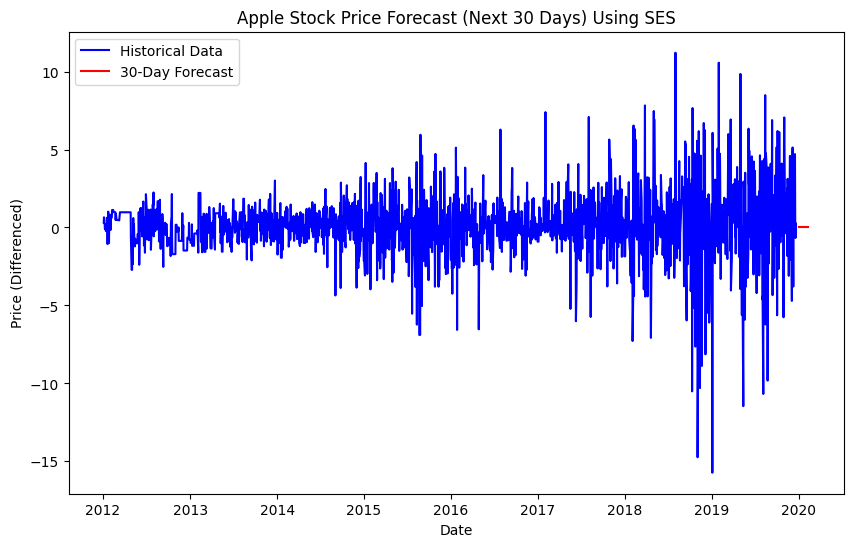

In [91]:
# Plot the historical and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Close_Diff'], label='Historical Data', color='blue')
plt.plot(forecast_SES['Forecast'], label='30-Day Forecast', color='red', linestyle='-')
plt.title('Apple Stock Price Forecast (Next 30 Days) Using SES')
plt.xlabel('Date')
plt.ylabel('Price (Differenced)')
plt.legend()
plt.show()

In [92]:
# Reverse differencing to original scale
forecast_original_scale = forecast_values.cumsum() + df['Close'].iloc[-1]

# Create a DataFrame with the original scale forecast
forecast_original_SES = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_original_scale
}).set_index('Date')

# Display the forecasted values in the original scale
print(forecast_original_SES)

              Forecast
Date                  
2019-12-31  279.479737
2020-01-01  279.519473
2020-01-02  279.559208
2020-01-03  279.598944
2020-01-06  279.638679
2020-01-07  279.678414
2020-01-08  279.718150
2020-01-09  279.757885
2020-01-10  279.797621
2020-01-13  279.837356
2020-01-14  279.877091
2020-01-15  279.916827
2020-01-16  279.956562
2020-01-17  279.996298
2020-01-20  280.036033
2020-01-21  280.075768
2020-01-22  280.115504
2020-01-23  280.155239
2020-01-24  280.194975
2020-01-27  280.234710
2020-01-28  280.274445
2020-01-29  280.314181
2020-01-30  280.353916
2020-01-31  280.393652
2020-02-03  280.433387
2020-02-04  280.473122
2020-02-05  280.512858
2020-02-06  280.552593
2020-02-07  280.592329
2020-02-10  280.632064


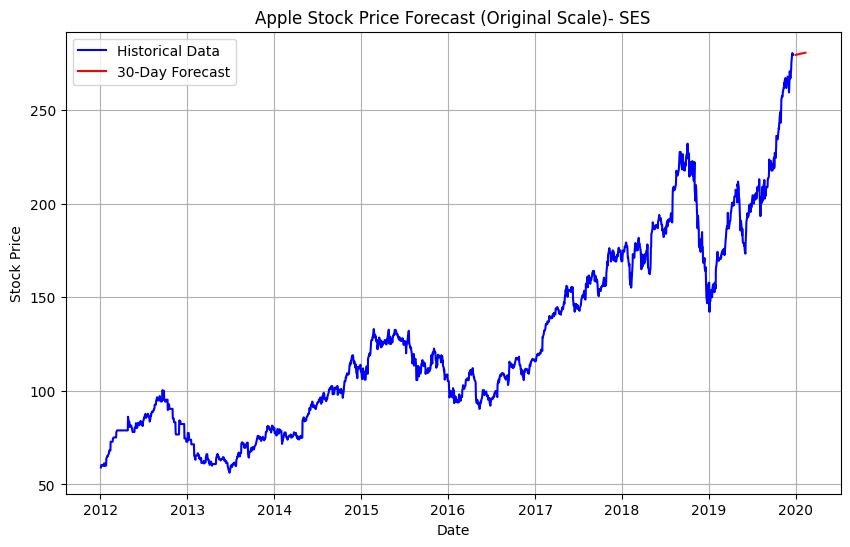

In [93]:
# Plot the historical and forecasted values in original scale
plt.figure(figsize=(10, 6))

# Plot the original historical data
plt.plot(df['Close'], label='Historical Data', color='blue')

# Plot the forecasted values (original scale)
plt.plot(forecast_original_SES['Forecast'], label='30-Day Forecast', color='red', linestyle='-')

# Customize the plot
plt.title('Apple Stock Price Forecast (Original Scale)- SES')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

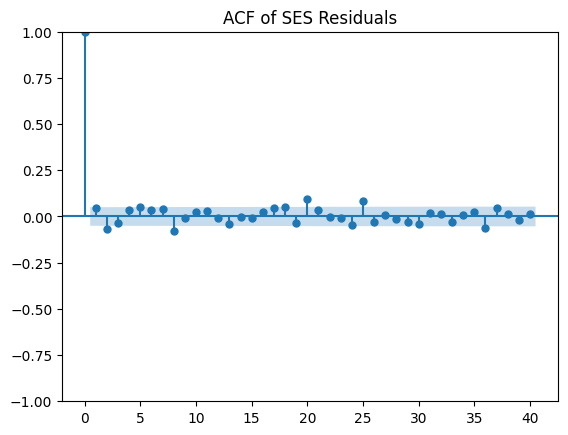

<Figure size 1000x600 with 0 Axes>

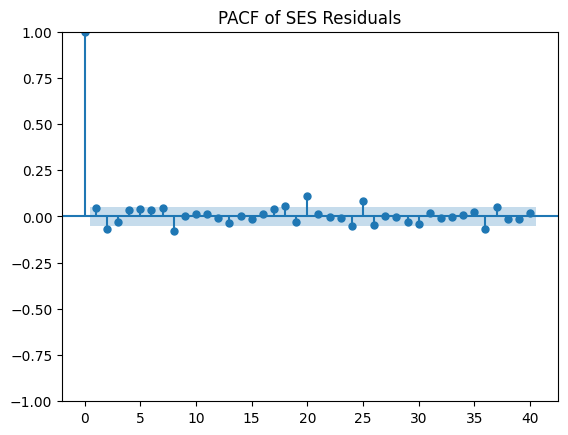

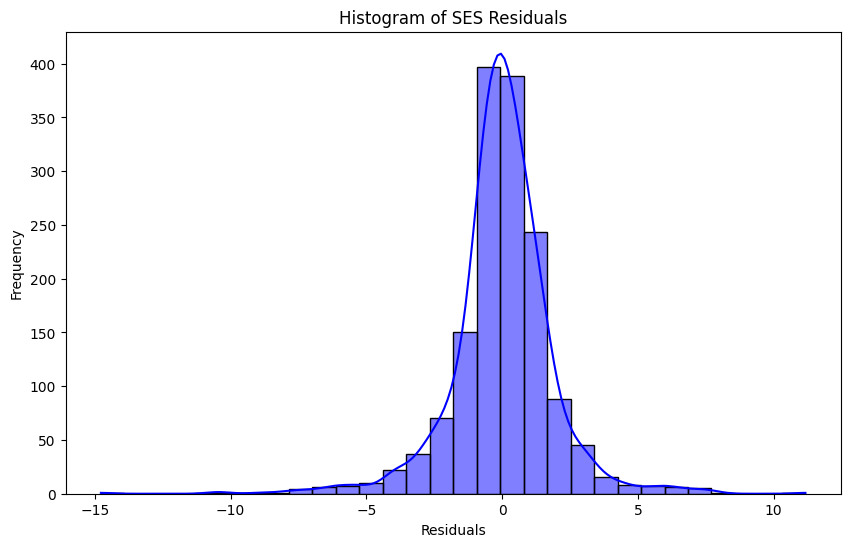

In [94]:
residuals_SES = SES_model_fit.resid

# 1. ACF of SES Residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals_SES, lags=40)
plt.title("ACF of SES Residuals")
plt.show()

# 2. PACF of SES Residuals
plt.figure(figsize=(10, 6))
plot_pacf(residuals_SES, lags=40)
plt.title("PACF of SES Residuals")
plt.show()

# 3. Histogram of SES Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_SES, kde=True, bins=30, color='blue')
plt.title("Histogram of SES Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Double Exponential Smoothing(Holt's Linear)

In [95]:
# Build the Double Exponential Smoothing model
DES_model = ExponentialSmoothing(train_data['Close_Diff'], trend='add', seasonal=None)  
DES_model_fit = DES_model.fit()

c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [96]:
# predict the test data
DES_pred = DES_model_fit.forecast(steps=len(test_data))

c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [97]:
DES_pred

1517   -0.073811
1518   -0.073962
1519   -0.074114
1520   -0.074266
1521   -0.074418
          ...   
1750   -0.109177
1751   -0.109329
1752   -0.109481
1753   -0.109632
1754   -0.109784
Length: 238, dtype: float64

In [98]:
# Calculate evaluation metrics
mae_DES = mean_absolute_error(actual, DES_pred)
mse_DES = mean_squared_error(actual, DES_pred)
rmse_DES = np.sqrt(mse_DES)
r2_DES = 1 - (np.sum((actual - DES_pred) ** 2) / np.sum((actual - actual.mean()) ** 2))

In [99]:
# Print the evaluation results
print(f"DES Mean Absolute Error (MAE): {mae_DES}")
print(f"DES Mean Squared Error (MSE): {mse_DES}")
print(f"DES Root Mean Squared Error (RMSE): {rmse_DES}")
print(f"DES R-squared (R²): {r2_DES}")

DES Mean Absolute Error (MAE): 2.410332477362602
DES Mean Squared Error (MSE): 10.90277537974571
DES Root Mean Squared Error (RMSE): 3.301935096234587
DES R-squared (R²): 1.0


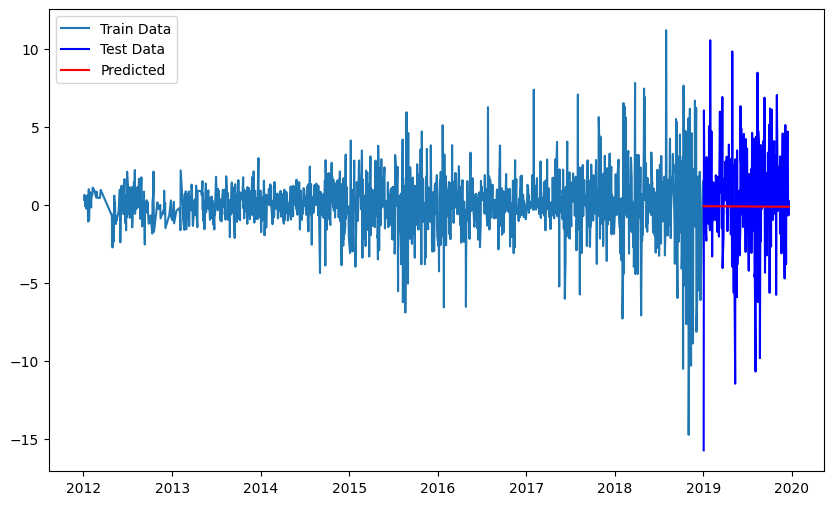

In [100]:
# Plot the actual vs predicted values Of Double ES
plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data['Close_Diff'], label='Train Data')
plt.plot(test_data.index, test_data['Close_Diff'], label='Test Data', color='blue')
plt.plot(test_data.index, DES_pred, label='Predicted', color='red')
plt.legend()
plt.show()

In [101]:
#Summary the model
print(DES_model_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Close_Diff   No. Observations:                 1517
Model:             ExponentialSmoothing   SSE                           5400.243
Optimized:                         True   AIC                           1934.149
Trend:                         Additive   BIC                           1955.447
Seasonal:                          None   AICC                          1934.205
Seasonal Periods:                  None   Date:                 Tue, 04 Feb 2025
Box-Cox:                          False   Time:                         15:41:07
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level           1.9489e-08                alpha                 True
smoothing_trend           4.8927e-

In [102]:
# Forecast the next 30 business days
forecast_steps = 30
forecast_values = DES_model_fit.forecast(steps=forecast_steps)

c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [103]:
# Generate dates for the forecast starting after the last date in the original data
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=11), periods=forecast_steps, freq='B')

In [104]:
# Create a DataFrame with forecasted values
forecast_DES = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_values
}).set_index('Date')

# Display the forecasted values
print(forecast_DES)

            Forecast
Date                
2019-12-31 -0.073811
2020-01-01 -0.073962
2020-01-02 -0.074114
2020-01-03 -0.074266
2020-01-06 -0.074418
2020-01-07 -0.074570
2020-01-08 -0.074721
2020-01-09 -0.074873
2020-01-10 -0.075025
2020-01-13 -0.075177
2020-01-14 -0.075328
2020-01-15 -0.075480
2020-01-16 -0.075632
2020-01-17 -0.075784
2020-01-20 -0.075936
2020-01-21 -0.076087
2020-01-22 -0.076239
2020-01-23 -0.076391
2020-01-24 -0.076543
2020-01-27 -0.076695
2020-01-28 -0.076846
2020-01-29 -0.076998
2020-01-30 -0.077150
2020-01-31 -0.077302
2020-02-03 -0.077453
2020-02-04 -0.077605
2020-02-05 -0.077757
2020-02-06 -0.077909
2020-02-07 -0.078061
2020-02-10 -0.078212


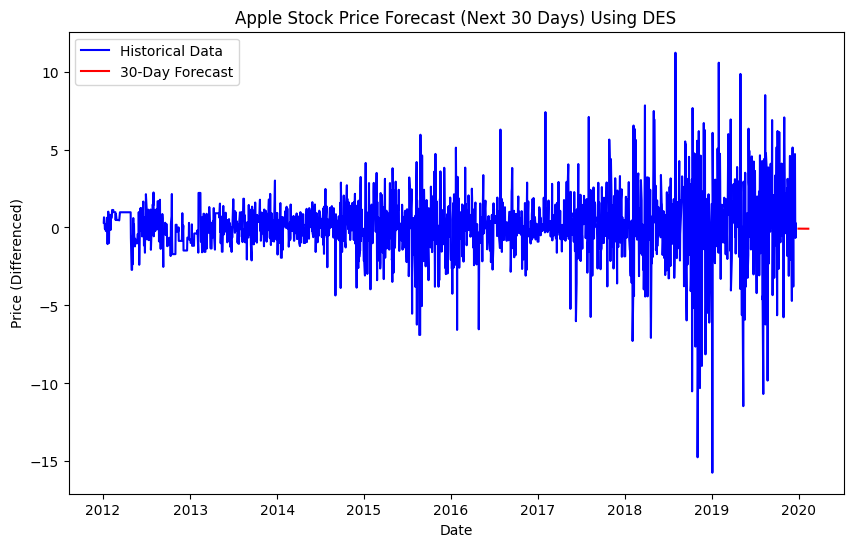

In [105]:
# Plot the historical and forecasted values Of DES
plt.figure(figsize=(10, 6))
plt.plot(df['Close_Diff'], label='Historical Data', color='blue')
plt.plot(forecast_DES['Forecast'], label='30-Day Forecast', color='red', linestyle='-')
plt.title('Apple Stock Price Forecast (Next 30 Days) Using DES')
plt.xlabel('Date')
plt.ylabel('Price (Differenced)')
plt.legend()
plt.show()

In [106]:
# Reverse differencing to original scale
forecast_original_scale = forecast_values.cumsum() + df['Close'].iloc[-1]

# Create a DataFrame with the original scale forecast
forecast_original_DES = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_original_scale
}).set_index('Date')

# Display the forecasted values in the original scale
print(forecast_original_DES)

              Forecast
Date                  
2019-12-31  279.366191
2020-01-01  279.292229
2020-01-02  279.218115
2020-01-03  279.143849
2020-01-06  279.069431
2020-01-07  278.994862
2020-01-08  278.920140
2020-01-09  278.845267
2020-01-10  278.770243
2020-01-13  278.695066
2020-01-14  278.619737
2020-01-15  278.544257
2020-01-16  278.468625
2020-01-17  278.392841
2020-01-20  278.316906
2020-01-21  278.240818
2020-01-22  278.164579
2020-01-23  278.088188
2020-01-24  278.011645
2020-01-27  277.934951
2020-01-28  277.858105
2020-01-29  277.781107
2020-01-30  277.703957
2020-01-31  277.626655
2020-02-03  277.549201
2020-02-04  277.471596
2020-02-05  277.393839
2020-02-06  277.315930
2020-02-07  277.237870
2020-02-10  277.159657


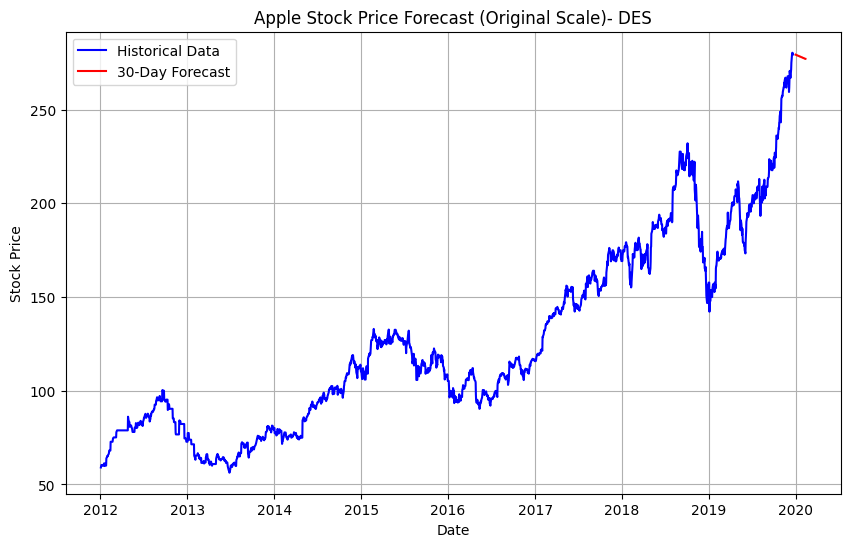

In [107]:
# Plot the historical and forecasted values in Original scale
plt.figure(figsize=(10, 6))

# Plot the original historical data
plt.plot(df['Close'], label='Historical Data', color='blue')

# Plot the forecasted values (original scale)
plt.plot(forecast_original_DES['Forecast'], label='30-Day Forecast', color='red', linestyle='-')

# Customize the plot
plt.title('Apple Stock Price Forecast (Original Scale)- DES')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()

<Figure size 800x400 with 0 Axes>

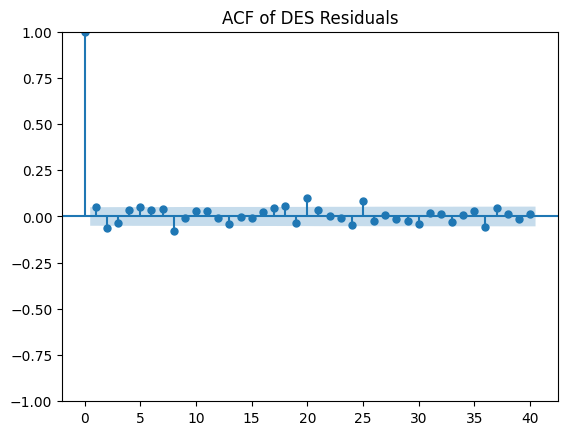

<Figure size 800x400 with 0 Axes>

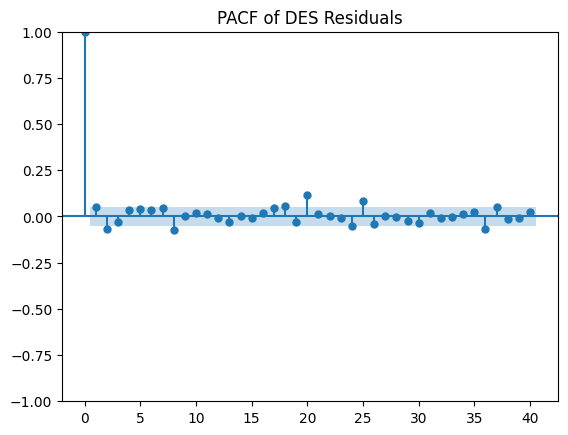

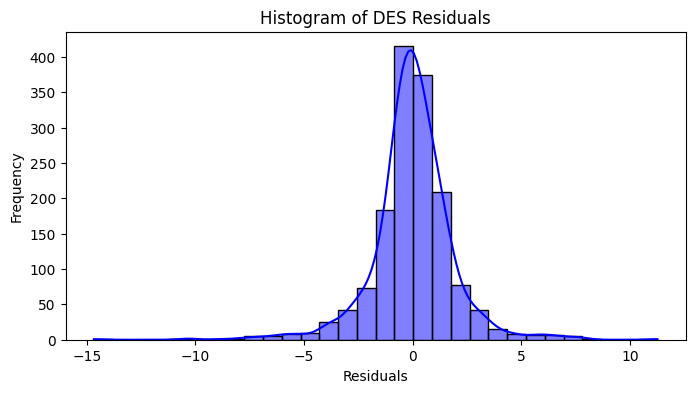

In [108]:
residuals_DES = DES_model_fit.resid

# 1. ACF of DES Residuals
plt.figure(figsize=(8, 4))
plot_acf(residuals_DES, lags=40)
plt.title("ACF of DES Residuals")
plt.show()

# 2. PACF of DES Residuals
plt.figure(figsize=(8, 4))
plot_pacf(residuals_DES, lags=40)
plt.title("PACF of DES Residuals")
plt.show()

# 3. Histogram of DES Residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals_DES, kde=True, bins=30, color='blue')
plt.title("Histogram of DES Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Triple Exponential Smoothing (Holt Winter's)

In [109]:
TES_model = ExponentialSmoothing(
    train_data['Close_Diff'],
    trend='add',  # Additive trend
    seasonal='add',  # Additive seasonality
    seasonal_periods=12  # Assuming monthly data with yearly seasonality
)

c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [110]:
# Fit the model
TES_model_fit = TES_model.fit()

In [111]:
# predict for the test data period
TES_pred = TES_model_fit.forecast(steps=len(test_data))

c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [112]:
TES_pred

1517   -0.209061
1518    0.096887
1519   -0.131595
1520    0.078873
1521    0.138599
          ...   
1750    0.054603
1751    0.063018
1752    0.108618
1753   -0.288210
1754    0.080554
Length: 238, dtype: float64

In [113]:
# Calculate evaluation metrics
mae_TES = mean_absolute_error(actual, TES_pred)
mse_TES = mean_squared_error(actual, TES_pred)
rmse_TES = np.sqrt(mse_TES)
r2_TES = 1 - (np.sum((actual - TES_pred) ** 2) / np.sum((actual - actual.mean()) ** 2))

In [114]:
# Print the evaluation results
print(f"TES Mean Absolute Error (MAE): {mae_TES}")
print(f"TES Mean Squared Error (MSE): {mse_TES}")
print(f"TES Root Mean Squared Error (RMSE): {rmse_TES}")
print(f"TES R-squared (R²): {r2_TES}")

TES Mean Absolute Error (MAE): 2.392937751925274
TES Mean Squared Error (MSE): 10.724774306638297
TES Root Mean Squared Error (RMSE): 3.274870120575516
TES R-squared (R²): 1.0


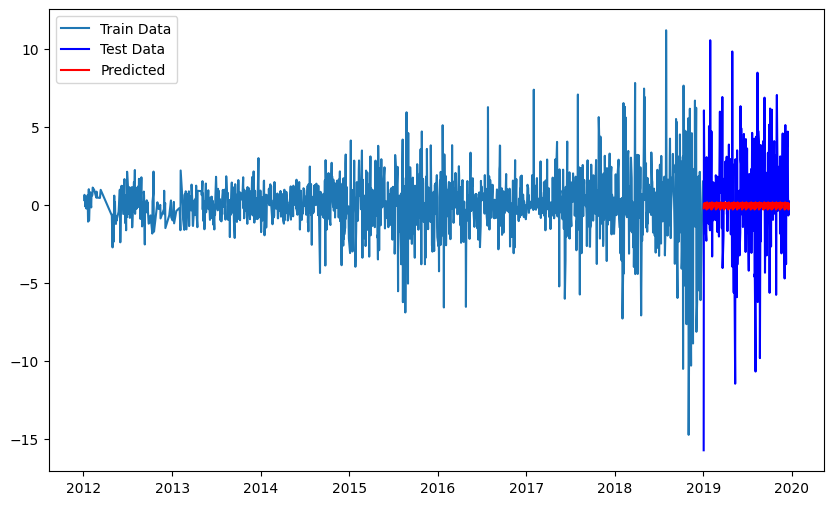

In [115]:
# Plot the actual vs predicted values of Triple ES
plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data['Close_Diff'], label='Train Data')
plt.plot(test_data.index, test_data['Close_Diff'], label='Test Data', color='blue')
plt.plot(test_data.index, TES_pred, label='Predicted', color='red')
plt.legend()
plt.show()

In [116]:
#Summary of the model
print(TES_model_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Close_Diff   No. Observations:                 1517
Model:             ExponentialSmoothing   SSE                           5364.243
Optimized:                         True   AIC                           1948.002
Trend:                         Additive   BIC                           2033.194
Seasonal:                      Additive   AICC                          1948.459
Seasonal Periods:                    12   Date:                 Tue, 04 Feb 2025
Box-Cox:                          False   Time:                         15:41:08
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level              6.7328e-08                alpha                 True
smoothing_trend          

In [117]:
#Forecasting the next 30 bussiness days
forecast_steps = 30
forecast_values = TES_model_fit.forecast(steps=forecast_steps)

c:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [118]:
# Generate dates for the forecast starting after the last date in the original data
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=11), periods=forecast_steps, freq='B')

In [119]:
# Create a DataFrame with forecasted values
forecast_TES = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_values
}).set_index('Date')

# Display the forecasted values
print(forecast_TES)

            Forecast
Date                
2019-12-31 -0.209061
2020-01-01  0.096887
2020-01-02 -0.131595
2020-01-03  0.078873
2020-01-06  0.138599
2020-01-07  0.058617
2020-01-08  0.067032
2020-01-09  0.112632
2020-01-10 -0.284195
2020-01-13  0.084568
2020-01-14  0.176887
2020-01-15  0.124153
2020-01-16 -0.209272
2020-01-17  0.096676
2020-01-20 -0.131807
2020-01-21  0.078662
2020-01-22  0.138388
2020-01-23  0.058406
2020-01-24  0.066821
2020-01-27  0.112421
2020-01-28 -0.284406
2020-01-29  0.084357
2020-01-30  0.176676
2020-01-31  0.123942
2020-02-03 -0.209484
2020-02-04  0.096465
2020-02-05 -0.132018
2020-02-06  0.078451
2020-02-07  0.138176
2020-02-10  0.058195


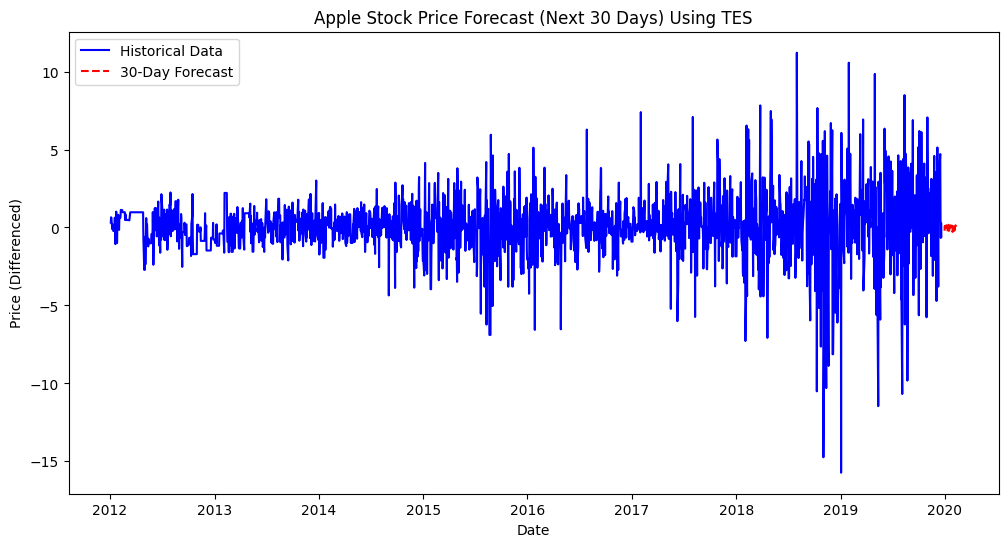

In [120]:
# Plot the historical and forecasted values Of triple ES
plt.figure(figsize=(12, 6))
plt.plot(df['Close_Diff'], label='Historical Data', color='blue')
plt.plot(forecast_TES['Forecast'], label='30-Day Forecast', color='red', linestyle='--')
plt.title('Apple Stock Price Forecast (Next 30 Days) Using TES')
plt.xlabel('Date')
plt.ylabel('Price (Differenced)')
plt.legend()
plt.show()

In [121]:
# Reverse differencing to original scale
forecast_original_scale = forecast_values.cumsum() + df['Close'].iloc[-1]

# Create a DataFrame with the original scale forecast
forecast_original_TES = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_original_scale
}).set_index('Date')

# Display the forecasted values in the original scale
print(forecast_original_TES)

              Forecast
Date                  
2019-12-31  279.230941
2020-01-01  279.327828
2020-01-02  279.196233
2020-01-03  279.275106
2020-01-06  279.413705
2020-01-07  279.472322
2020-01-08  279.539354
2020-01-09  279.651986
2020-01-10  279.367791
2020-01-13  279.452360
2020-01-14  279.629247
2020-01-15  279.753400
2020-01-16  279.544127
2020-01-17  279.640803
2020-01-20  279.508997
2020-01-21  279.587659
2020-01-22  279.726046
2020-01-23  279.784452
2020-01-24  279.851273
2020-01-27  279.963694
2020-01-28  279.679287
2020-01-29  279.763644
2020-01-30  279.940320
2020-01-31  280.064262
2020-02-03  279.854778
2020-02-04  279.951243
2020-02-05  279.819225
2020-02-06  279.897676
2020-02-07  280.035852
2020-02-10  280.094046


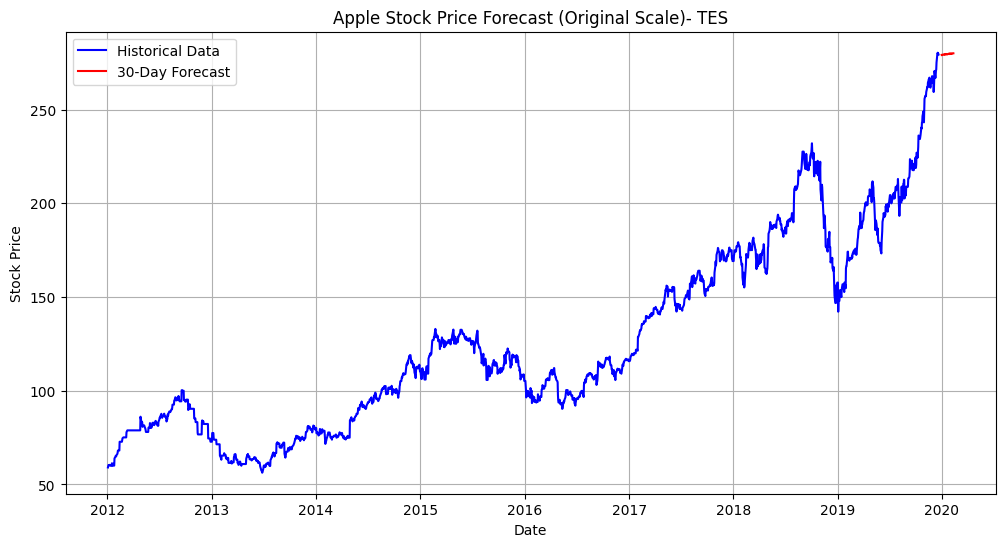

In [122]:
# Plot the historical and forecasted values
plt.figure(figsize=(12, 6))

# Plot the original historical data
plt.plot(df['Close'], label='Historical Data', color='blue')

# Plot the forecasted values (original scale)
plt.plot(forecast_original_TES['Forecast'], label='30-Day Forecast', color='red', linestyle='-')

# Customize the plot
plt.title('Apple Stock Price Forecast (Original Scale)- TES')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()

<Figure size 800x400 with 0 Axes>

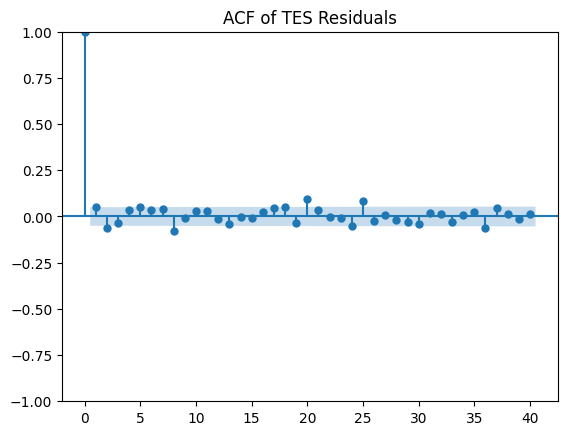

<Figure size 800x400 with 0 Axes>

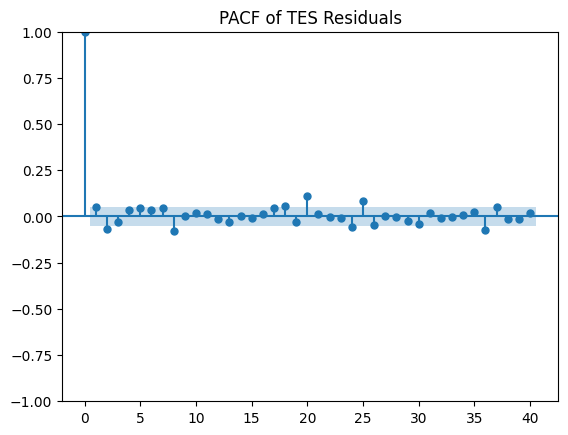

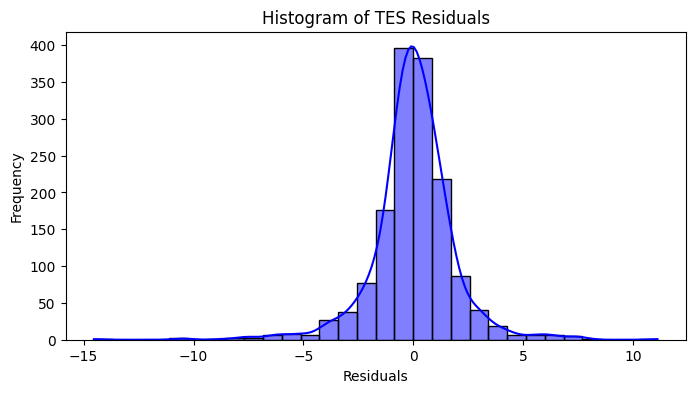

In [123]:
residuals_TES = TES_model_fit.resid

# 1. ACF of TES Residuals
plt.figure(figsize=(8, 4))
plot_acf(residuals_TES, lags=40)
plt.title("ACF of TES Residuals")
plt.show()

# 2. PACF of TES Residuals
plt.figure(figsize=(8, 4))
plot_pacf(residuals_TES, lags=40)
plt.title("PACF of TES Residuals")
plt.show()

# 3. Histogram of TES Residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals_TES, kde=True, bins=30, color='blue')
plt.title("Histogram of TES Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [124]:
#Comparing the models
from tabulate import tabulate

# Define the data
data = [
    ["ARIMA(2,0,2)", mae_ARIMA, mse_ARIMA, rmse_ARIMA, r2_ARIMA,'6213.933','6245.880'],
    ["SARIMA(2,0,2)(2,0,4)[12]", mae_SARIMA, mse_SARIMA, rmse_SARIMA, r2_SARIMA,'6046.129','6104.323'],
    ["SES", mae_SES, mse_SES, rmse_SES, r2_SES,'1928.695','1939.343'],
    ["DES", mae_DES, mse_DES, rmse_DES, r2_DES,'1932.670','1953.968'],
    ["TES", mae_TES, mse_TES, rmse_TES, r2_TES,'1948.079','2033.271' ]
]

# Define the headers
headers = ["Model", "MAE", "MSE", "RMSE", "R²", "AIC", "BIC"]

# Create the table
table = tabulate(data, headers=headers, floatfmt=".2f")

# Print the table
print(table)


Model                       MAE    MSE    RMSE    R²      AIC      BIC
------------------------  -----  -----  ------  ----  -------  -------
ARIMA(2,0,2)               2.43  11.09    3.33  1.00  6213.93  6245.88
SARIMA(2,0,2)(2,0,4)[12]   2.42  11.17    3.34  1.00  6046.13  6104.32
SES                        2.39  10.75    3.28  1.00  1928.69  1939.34
DES                        2.41  10.90    3.30  1.00  1932.67  1953.97
TES                        2.39  10.72    3.27  1.00  1948.08  2033.27


In [125]:
'''By comparing the models, Holt-Winter's Exponential smoothing (Triple ES) having Minimum errors. So, Holt Winter's model likely To perform better than the other models.'''

"By comparing the models, Holt-Winter's Exponential smoothing (Triple ES) having Minimum errors. So, Holt Winter's model likely To perform better than the other models."

## Saving The Model & Dataset

In [126]:
model = ExponentialSmoothing(
    df['Close_Diff'],
    trend='add',  # Additive trend
    seasonal='add',  # Additive seasonality
    seasonal_periods=12  
)

In [127]:
# Fit the model
model_fit=model.fit()

In [128]:
#Predict the model
pred = model_fit.forecast(steps=len(df['Close_Diff']))
pred

2019-12-23    0.924838
2019-12-24    0.849113
2019-12-25    0.860403
2019-12-26    1.135978
2019-12-27    0.855958
                ...   
2027-12-02    1.400634
2027-12-03    1.452543
2027-12-06    1.471509
2027-12-07    1.497628
2027-12-08    1.421903
Freq: B, Length: 2078, dtype: float64

In [129]:
#Calculate evaluation metrics
mae = mean_absolute_error(df['Close_Diff'], pred)
mse = mean_squared_error(df['Close_Diff'], pred)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((df['Close_Diff']- pred) ** 2) / np.sum((df['Close_Diff'] - df['Close_Diff'].mean()) ** 2))

In [130]:
# Print the evaluation results
print(f" Mean Absolute Error (MAE): {mae}")
print(f" Mean Squared Error (MSE): {mse}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f" R-squared (R²): {r2}")

 Mean Absolute Error (MAE): 1.6584219521957286
 Mean Squared Error (MSE): 5.386329460869944
 Root Mean Squared Error (RMSE): 2.3208467120578953
 R-squared (R²): 1.0


In [131]:
# Forecast the next 30 business days
forecast_steps = 30
forecast_values = model_fit.forecast(steps=forecast_steps)

In [132]:
# Generate dates for the forecast starting after the last date in the original data
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=11), periods=forecast_steps, freq='B')

In [133]:
# Create a DataFrame with forecasted values
forecast = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_values
}).set_index('Date')

In [134]:
# Reverse differencing to original scale
forecast_original_scale = forecast_values.cumsum() + df['Close'].iloc[-1]

# Create a DataFrame with the original scale forecast
forecast_original= pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_original_scale
}).set_index('Date')

# Display the forecasted values in the original scale
print(forecast_original)

              Forecast
Date                  
2019-12-31  280.364840
2020-01-01  281.213952
2020-01-02  282.074355
2020-01-03  283.210333
2020-01-06  284.066291
2020-01-07  285.029477
2020-01-08  285.795111
2020-01-09  286.711124
2020-01-10  287.475916
2020-01-13  288.307070
2020-01-14  289.190134
2020-01-15  290.092163
2020-01-16  291.020312
2020-01-17  291.872735
2020-01-20  292.736449
2020-01-21  293.875738
2020-01-22  294.735007
2020-01-23  295.701504
2020-01-24  296.470449
2020-01-27  297.389772
2020-01-28  298.157876
2020-01-29  298.992341
2020-01-30  299.878716
2020-01-31  300.784056
2020-02-03  301.715515
2020-02-04  302.571250
2020-02-05  303.438274
2020-02-06  304.580874
2020-02-07  305.443454
2020-02-10  306.413262


In [135]:
df.index = pd.to_datetime(df.index)
df = df.reset_index()
df

,index,Open,High,Low,Close,Adj Close,Volume,Close_rolling_mean,Close_rolling_std,Close_Diff
0,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500.0,NaN,NaN,0.315716
1,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400.0,NaN,NaN,0.655712
2,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200.0,NaN,NaN,0.624286
3,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100.0,NaN,NaN,-0.095714
4,2012-01-10,60.844284,60.857143,60.214287,60.462856,52.248333,64549100.0,NaN,NaN,0.215713
...,...,...,...,...,...,...,...,...,...,...
2073,2019-12-16,277.000000,280.790009,276.980011,279.859985,277.942474,32046500.0,264.962334,5.220723,4.709991
2074,2019-12-17,279.570007,281.769989,278.799988,280.410004,278.488770,28539600.0,265.726001,5.741173,0.550019
2075,2019-12-18,279.799988,281.899994,279.119995,279.739990,277.823334,29007100.0,266.479667,6.049598,-0.670014
2076,2019-12-19,279.500000,281.179993,278.950012,280.019989,278.101410,24592300.0,267.239000,6.275300,0.279999


In [136]:
df.rename(columns={'index': 'Date'}, inplace=True)

In [137]:
df.to_csv('APPLE_Data.csv')

In [138]:
# Set 'Date' as index 
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [139]:
import pickle

# Saving Random Forest model 
model_file_name = "stok_market.pkl"

try:
    with open(model_file_name, 'wb') as file:
        pickle.dump(TES_model, file)
    print(f"Model saved successfully to {model_file_name}")
except Exception as e:
    print(f"Error saving the model: {e}")

Model saved successfully to stok_market.pkl
